In [181]:
import numpy as np
import random as rd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

class obj_define:
    # obj_type(int): {0:man, 1:ghost, 2:candy, 3:flower}
    # obj_x, obj_y(int): coordinates of objects
    # -----------------------------------------
    # attributes
    # mask(np.array): 
    # -----------------------------------------
    def __init__(self, obj_type, obj_x, obj_y):
        if obj_type in [0, 1, 2, 3]:
            self.obj_type = obj_type
            
        if obj_x <= 56 and obj_x >= 0:
            self.obj_x = obj_x
            
        if obj_y <= 56 and obj_y >= 0:
            self.obj_y = obj_y
            
        #if hasattr(self, "obj_type"):
        if self.obj_type == 0:
            self.mask = self.man_live_mask()
        elif self.obj_type == 1:
            self.mask = self.ghost_mask()
        elif self.obj_type == 2:
            self.mask = self.candy_mask()
        elif self.obj_type == 3:
            self.mask = self.flower_mask()
            
    def man_live_mask(self):
        #man_mask = np.loadtxt("./man_live_mask.txt", dtype=int)
        man_mask = np.loadtxt("./mask0.txt", dtype=int)
        return man_mask
    
    def ghost_mask(self):
        #ghost_mask = np.loadtxt("./ghost_mask.txt", dtype=int)
        ghost_mask = np.loadtxt("./mask3.txt", dtype=int)
        return ghost_mask
    
    def candy_mask(self):
        #candy_mask = np.loadtxt("./candy_mask.txt", dtype=int)
        candy_mask = np.loadtxt("./mask4.txt", dtype=int)
        return candy_mask
    
    def flower_mask(self):
        #flower_mask = np.loadtxt("./flower_mask.txt", dtype=int)
        flower_mask = np.loadtxt("./mask5.txt", dtype=int)
        return flower_mask
#------------
110011110000

class load_color:
    def flower_color_map():
        #flower_color_map = np.loadtxt("./flower_color_map.txt", dtype=int)
        flower_color_map = np.loadtxt("./color5.txt", dtype=int)
        return flower_color_map.reshape((8,8,3))
    
    def man_live_color_map():
        #man_live_color_map = np.loadtxt("./man_live_color_map.txt", dtype=int)
        man_live_color_map = np.loadtxt("./color0.txt", dtype=int)
        return man_live_color_map.reshape((8,8,3))
    
    def man_happy_color_map():
        #man_happy_color_map = np.loadtxt("./man_happy_color_map.txt", dtype=int)
        man_happy_color_map = np.loadtxt("./color1.txt", dtype=int)
        return man_happy_color_map.reshape((8,8,3))
    
    def man_die_color_map():
        #man_die_color_map = np.loadtxt("./man_die_color_map.txt", dtype=int)
        man_die_color_map = np.loadtxt("./color2.txt", dtype=int)
        return man_die_color_map.reshape((8,8,3))
    
    def ghost_color_map():
        #ghost_color_map = np.loadtxt("./ghost_color_map.txt", dtype=int)
        ghost_color_map = np.loadtxt("./color3.txt", dtype=int)
        return ghost_color_map.reshape((8,8,3))
    
    def candy_color_map():
        #candy_color_map = np.loadtxt("./candy_color_map.txt", dtype=int)
        candy_color_map = np.loadtxt("./color4.txt", dtype=int)
        return candy_color_map.reshape((8,8,3))
    
def write_color(bkgrnd, color_map, obj):
    for j in range(color_map.shape[0]):
        for i in range(color_map.shape[1]):
            if obj.mask[j][i] == 1:
                bkgrnd[j+obj.obj_y][i+obj.obj_x] = color_map[j][i]
    return bkgrnd

def print_background(bckgrnd):
    fig = plt.figure(figsize=(64,64))
    plt.imshow(bckgrnd)
    plt.show()
    
        
def create_background():
    bkgrnd = np.full((64,64,3),np.array([12, 15, 0]))
    #bkgrnd = np.full((64,64,3),np.array([6, 9, 3]))
    return bkgrnd

def determine_man_status(man_status, queue):
    man = queue[0]
    happy_flag = 0
    for obj in queue[1:]:
        if happy_flag == 1:
            break
        else:
            if obj.obj_type == 2:
                if determine_man_overlap(man, obj):
                    man_status = 'happy'
                    happy_flag = 1
            elif obj.obj_type == 1:
                if determine_man_overlap(man, obj):
                    man_status = 'die'
    return man_status

def determine_man_overlap(man, obj):
    # arguments are obj_define class
    empty_space_for_man = np.zeros((64,64),dtype=int)
    empty_space_for_obj = np.zeros((64,64),dtype=int)
    empty_space_for_man[man.obj_y : man.obj_y + man.mask.shape[0], man.obj_x : man.obj_x + man.mask.shape[1]] = man.mask
    empty_space_for_obj[obj.obj_y : obj.obj_y + obj.mask.shape[0], obj.obj_x : obj.obj_x + obj.mask.shape[1]] = obj.mask
    if np.sum(empty_space_for_man & empty_space_for_obj) != 0:
        return True
    else:
        return False
    
def print_mask_in_map(man, obj):
    empty_space = np.zeros((64,64),dtype=int)
    empty_space[obj.obj_y : obj.obj_y + obj.mask.shape[0], obj.obj_x : obj.obj_x + obj.mask.shape[1]] = obj.mask
    empty_space[man.obj_y : man.obj_y + man.mask.shape[0], man.obj_x : man.obj_x + man.mask.shape[1]] = man.mask*2
    fig = plt.figure(figsize=(64,64))
    plt.imshow(empty_space)
    plt.show()
    
def save_golden(file_name, bckgrnd):
    f_w = open(file_name,'w')
    bckgrnd_reshape = bckgrnd.reshape(4096,3)
    for i in bckgrnd_reshape:
        mem_str = ''
        for j in i:
            mem_str = mem_str + '{0:04b}'.format(j)
        f_w.write(mem_str + '\n')
    f_w.close() 

def save_image(file_name, bckgrnd):
    img = bckgrnd[:,:,::-1]*16 + 15
    cv2.imwrite(file_name,img)
    img_r = cv2.imread(file_name)
    img_resize = cv2.resize(img_r, (512,512), interpolation=cv2.INTER_NEAREST)
    cv2.imwrite(file_name,img_resize)
    
def save_input_pattern(file_name, queue):
    f_w = open(file_name,'w')
    f_w.write('{0:06b}'.format(len(queue)) + '\n')
    for obj in queue:
        mem_str = '{0:06b}'.format(obj.obj_x) + '{0:06b}'.format(obj.obj_y) + '{0:02b}'.format(obj.obj_type)
        f_w.write(mem_str + '\n')
    f_w.close() 


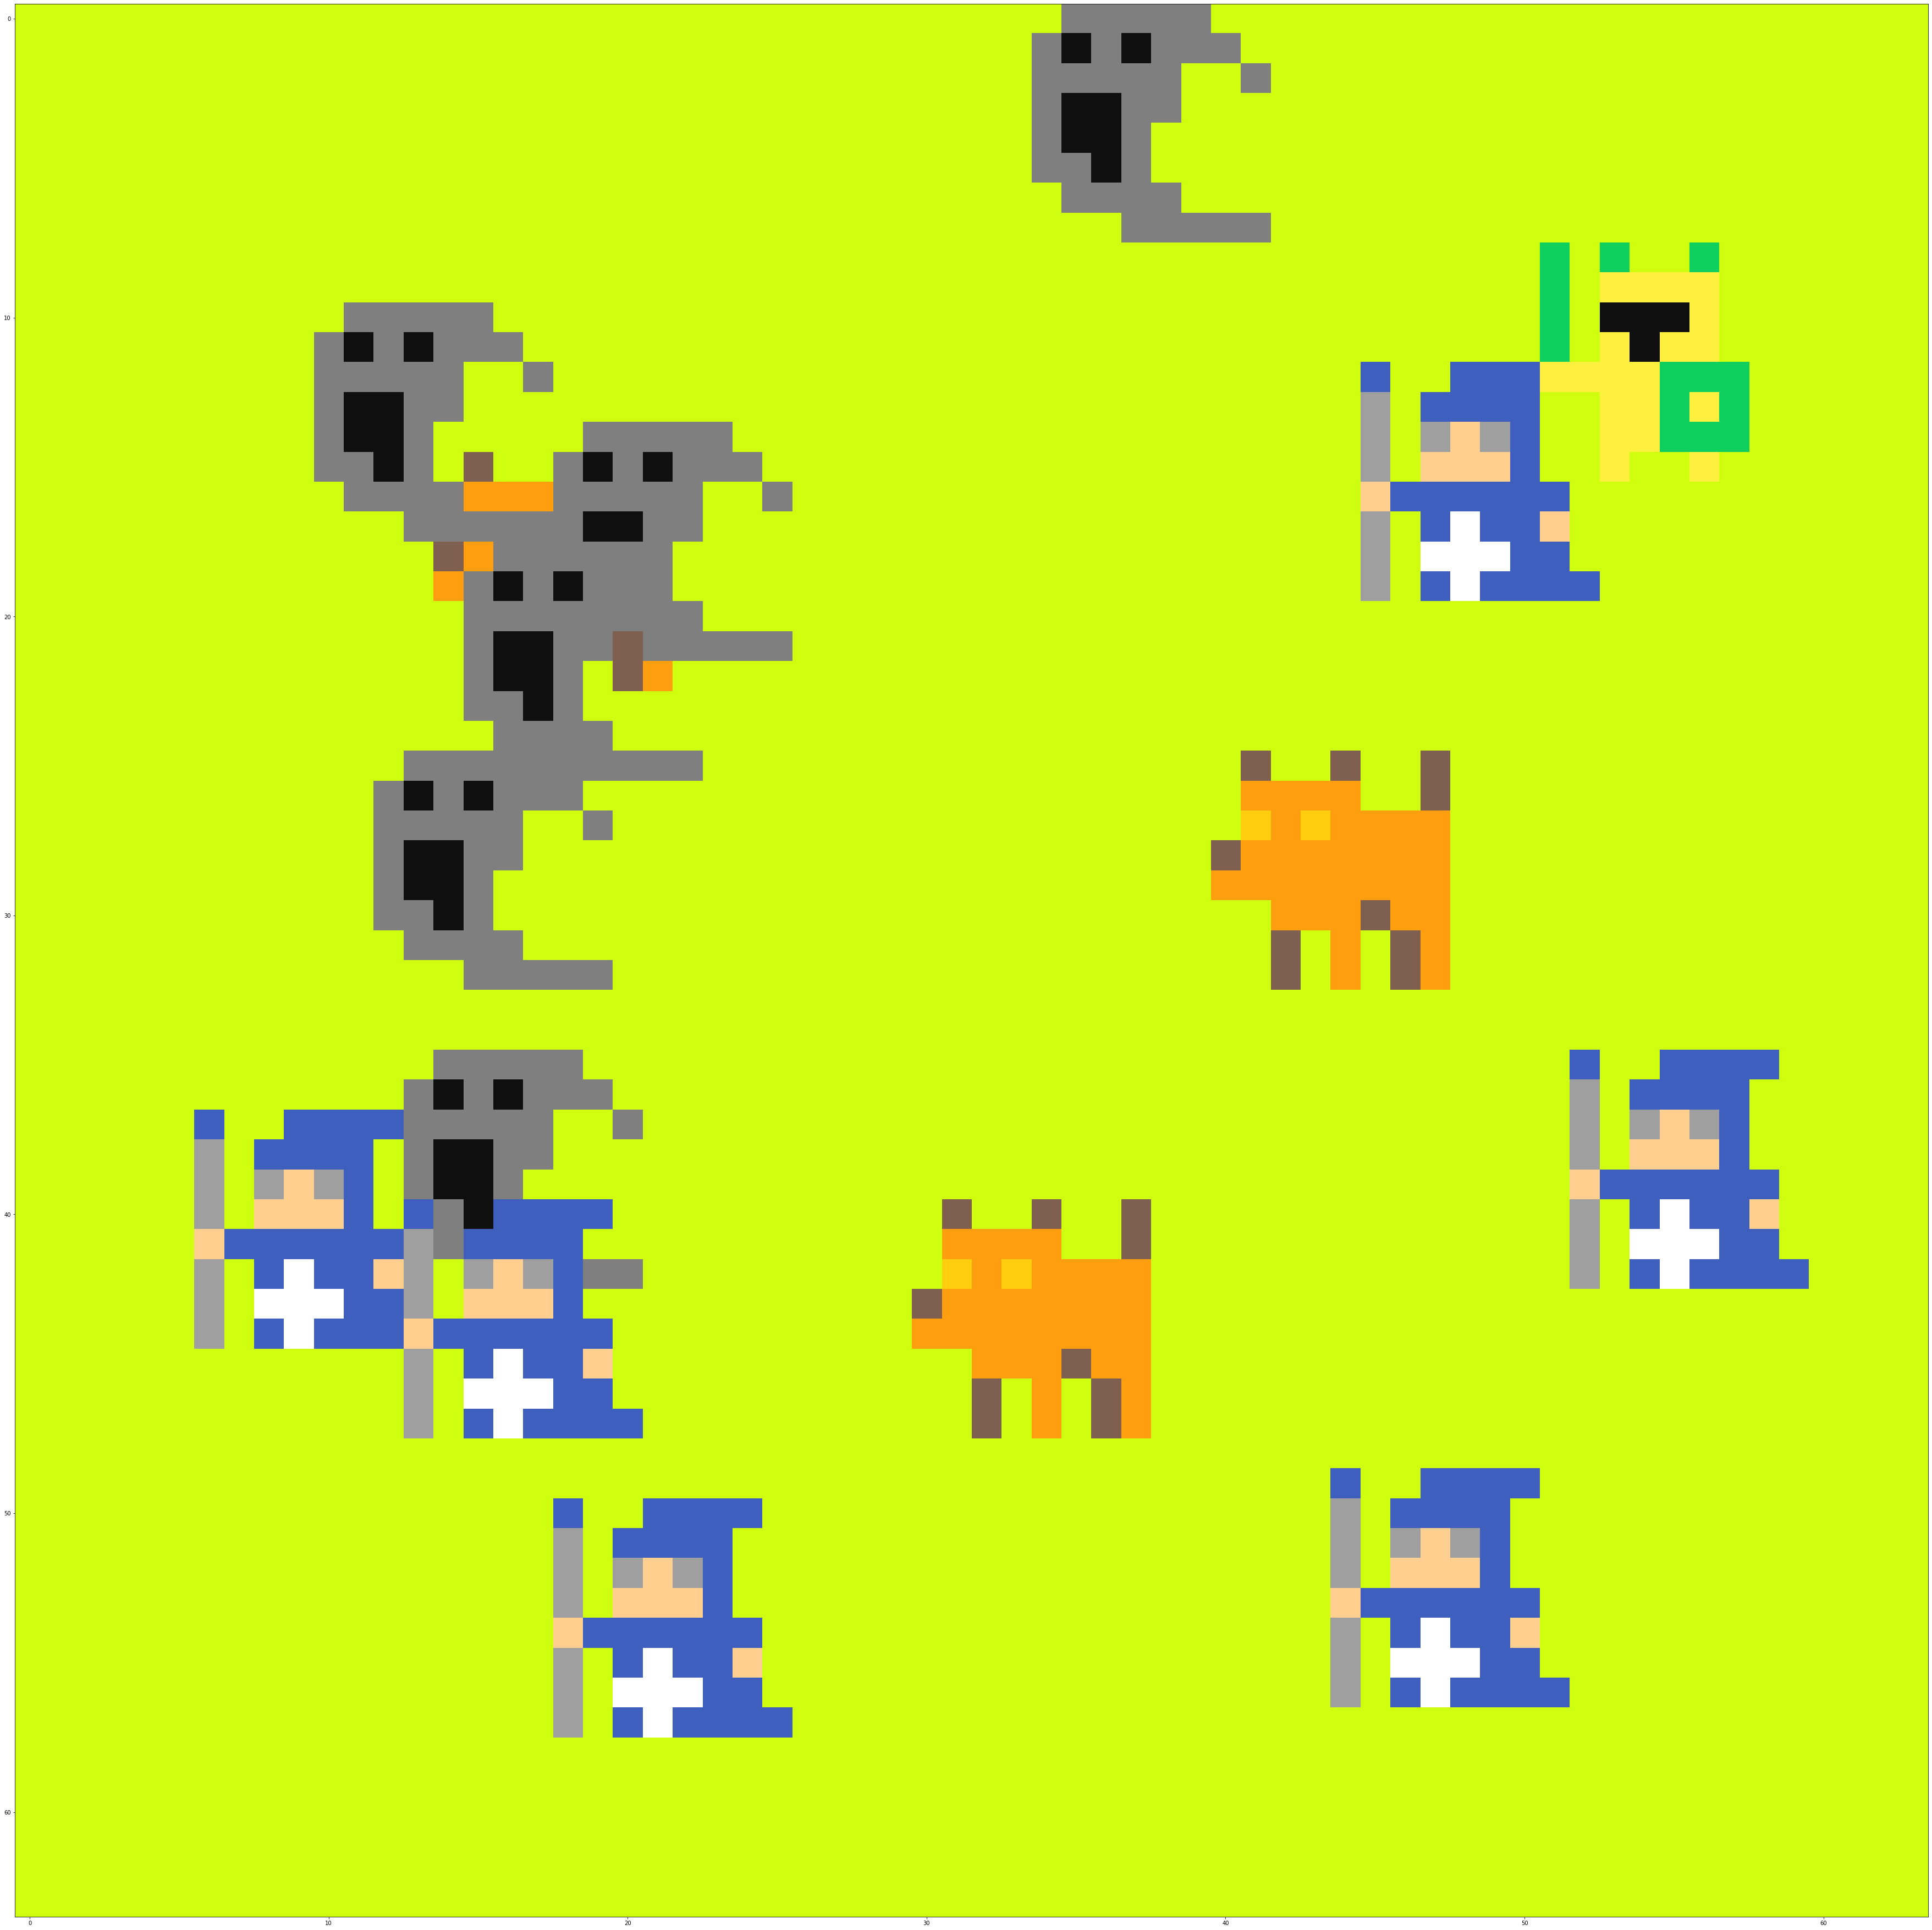

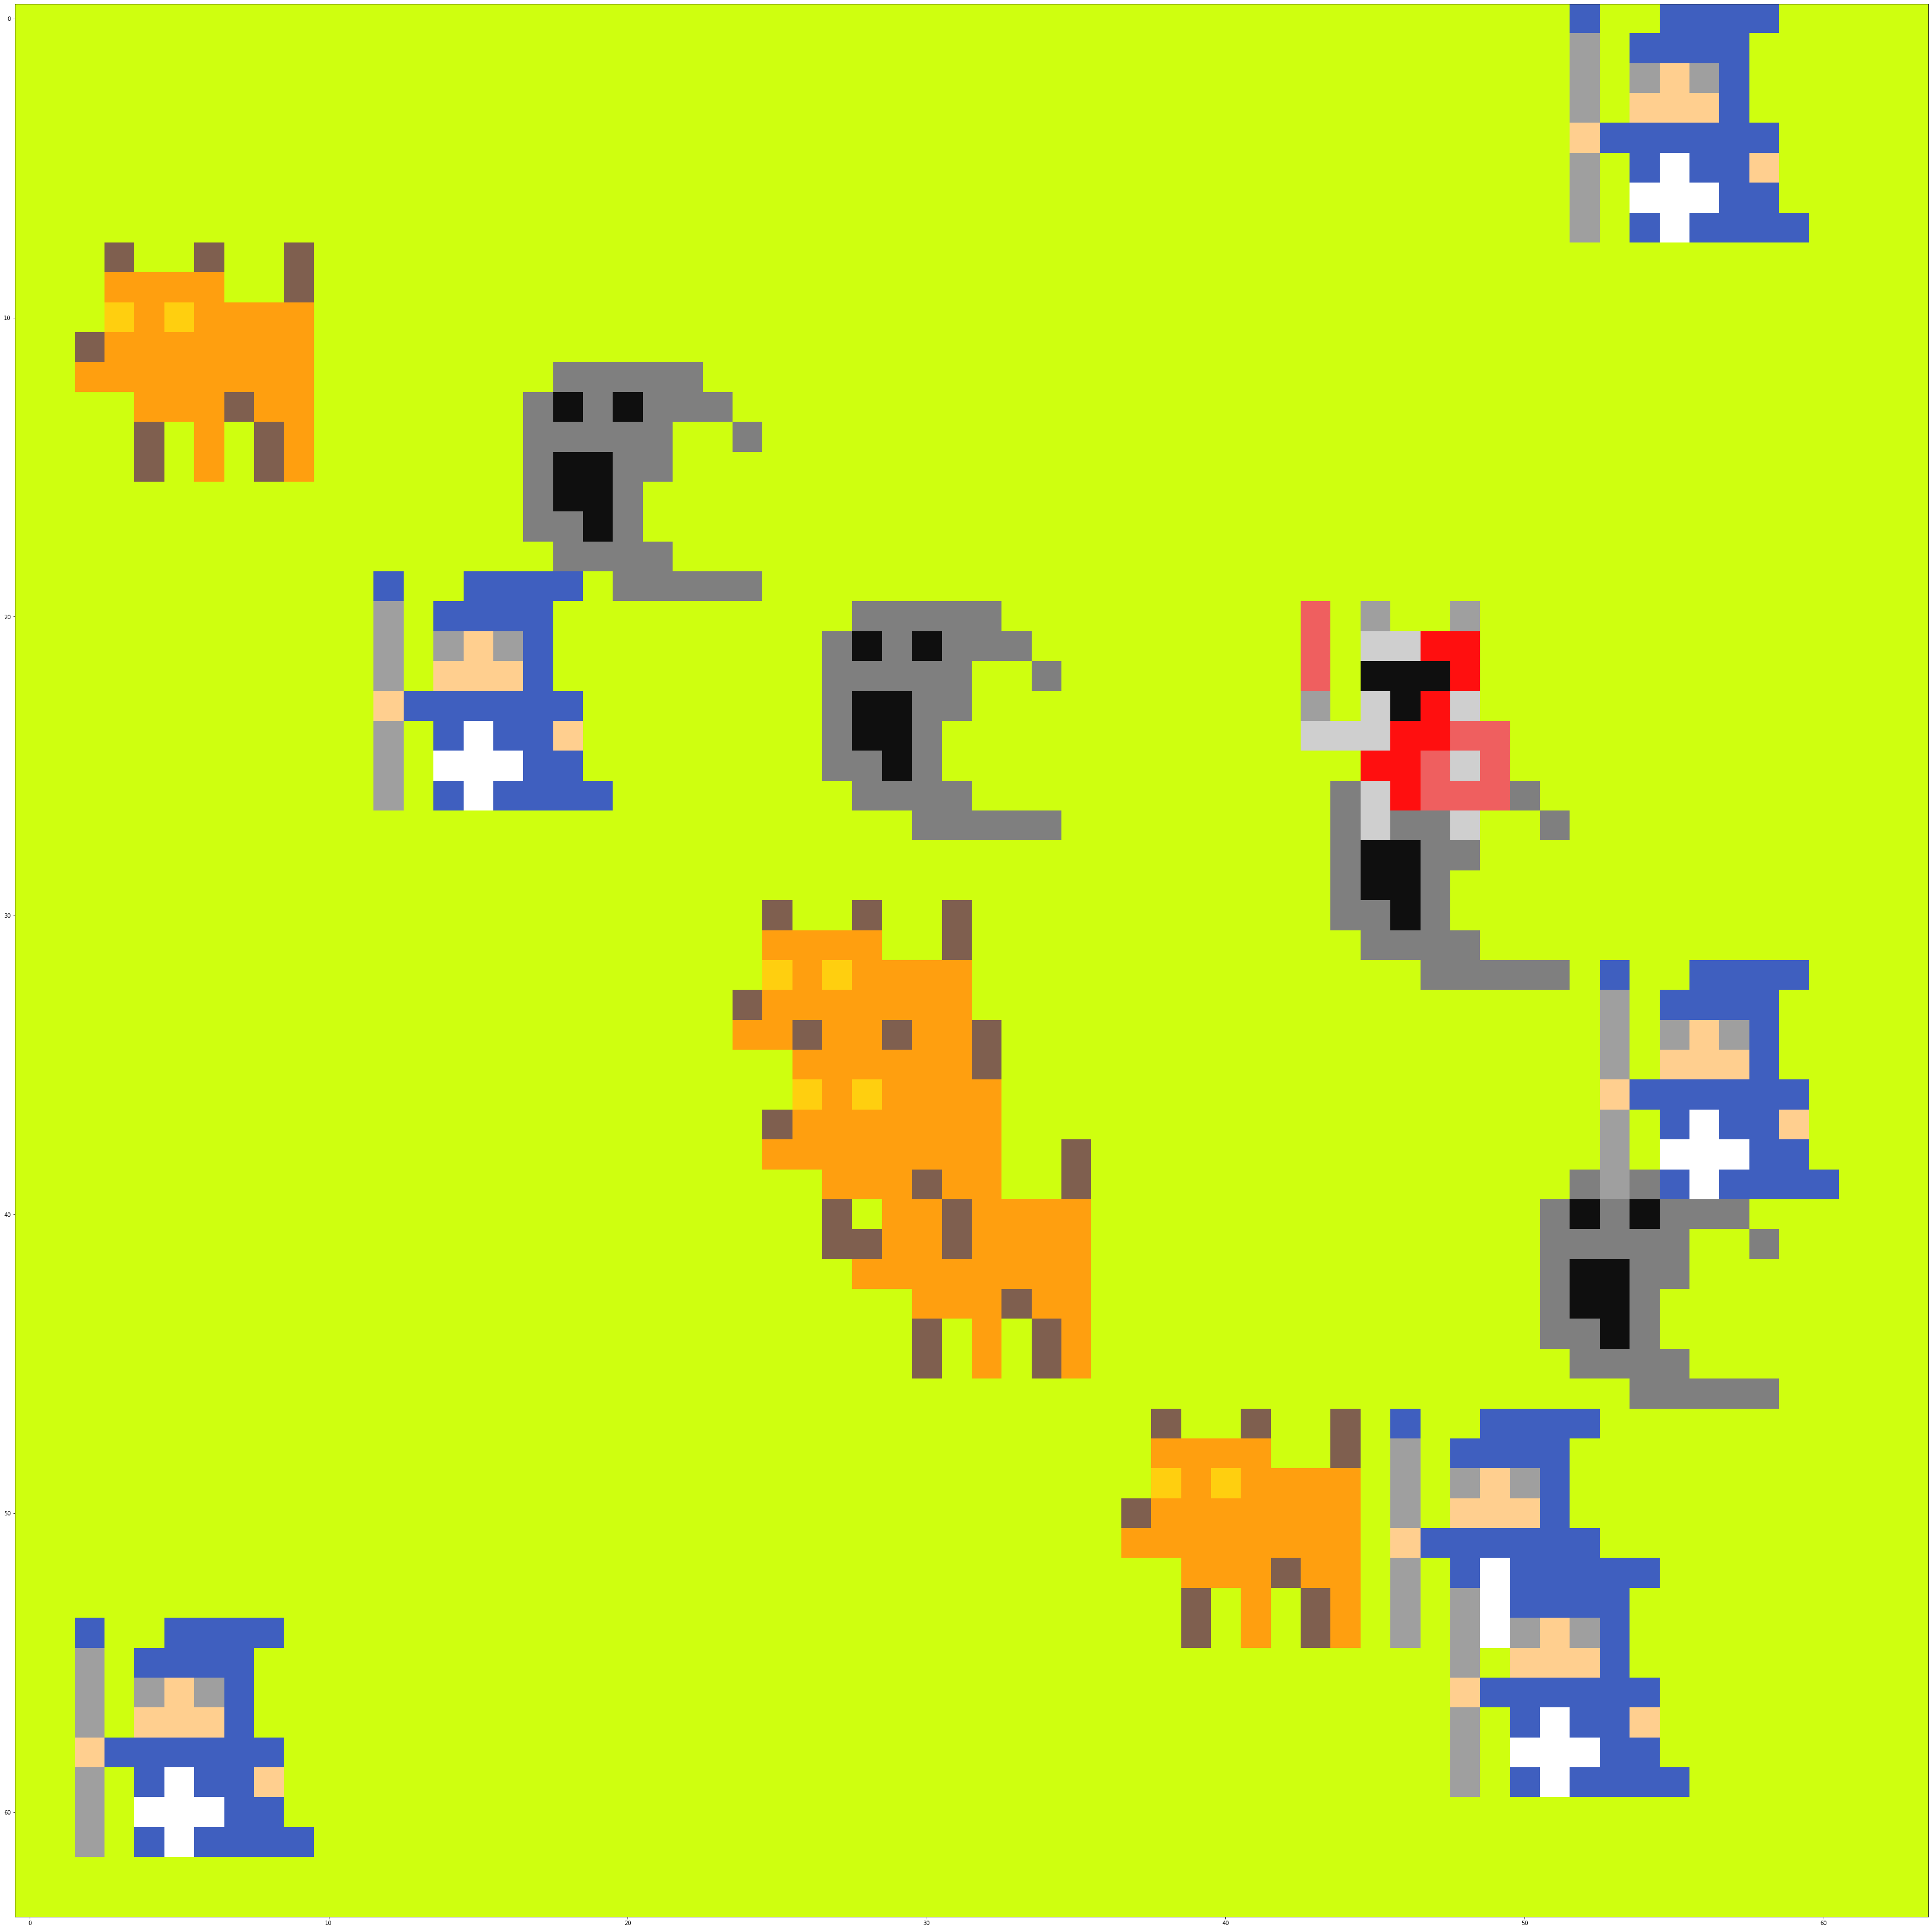

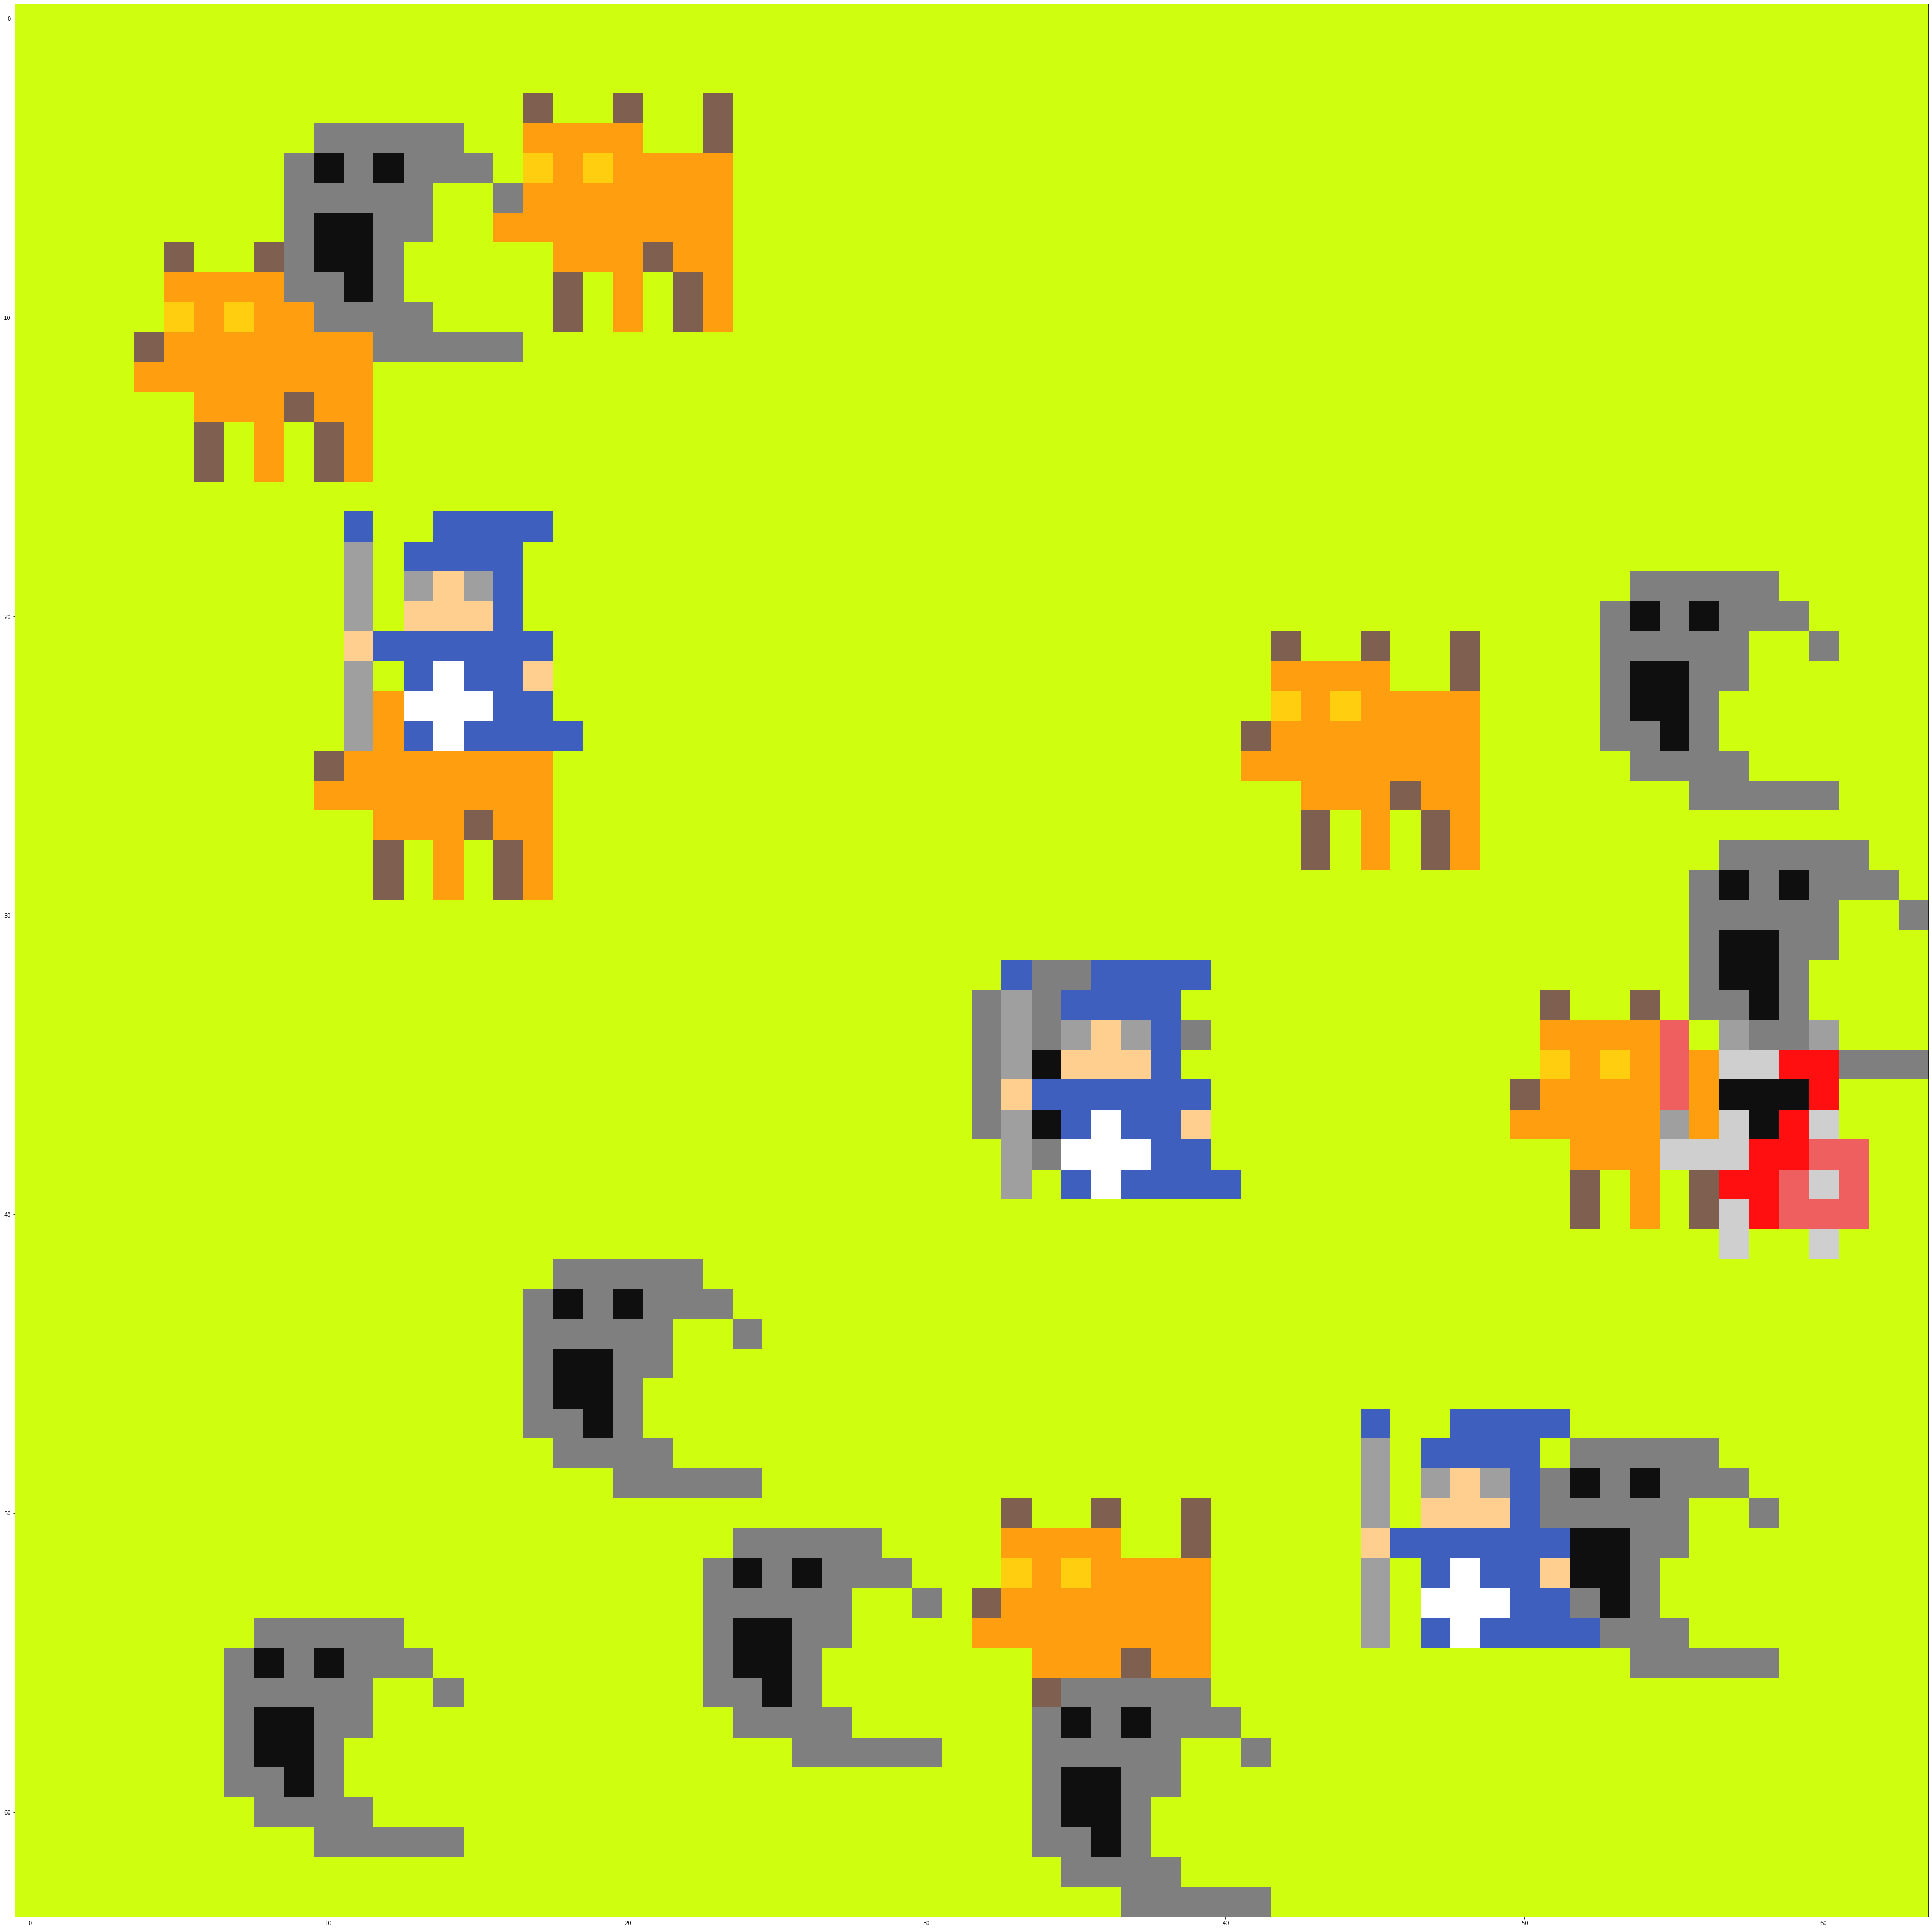

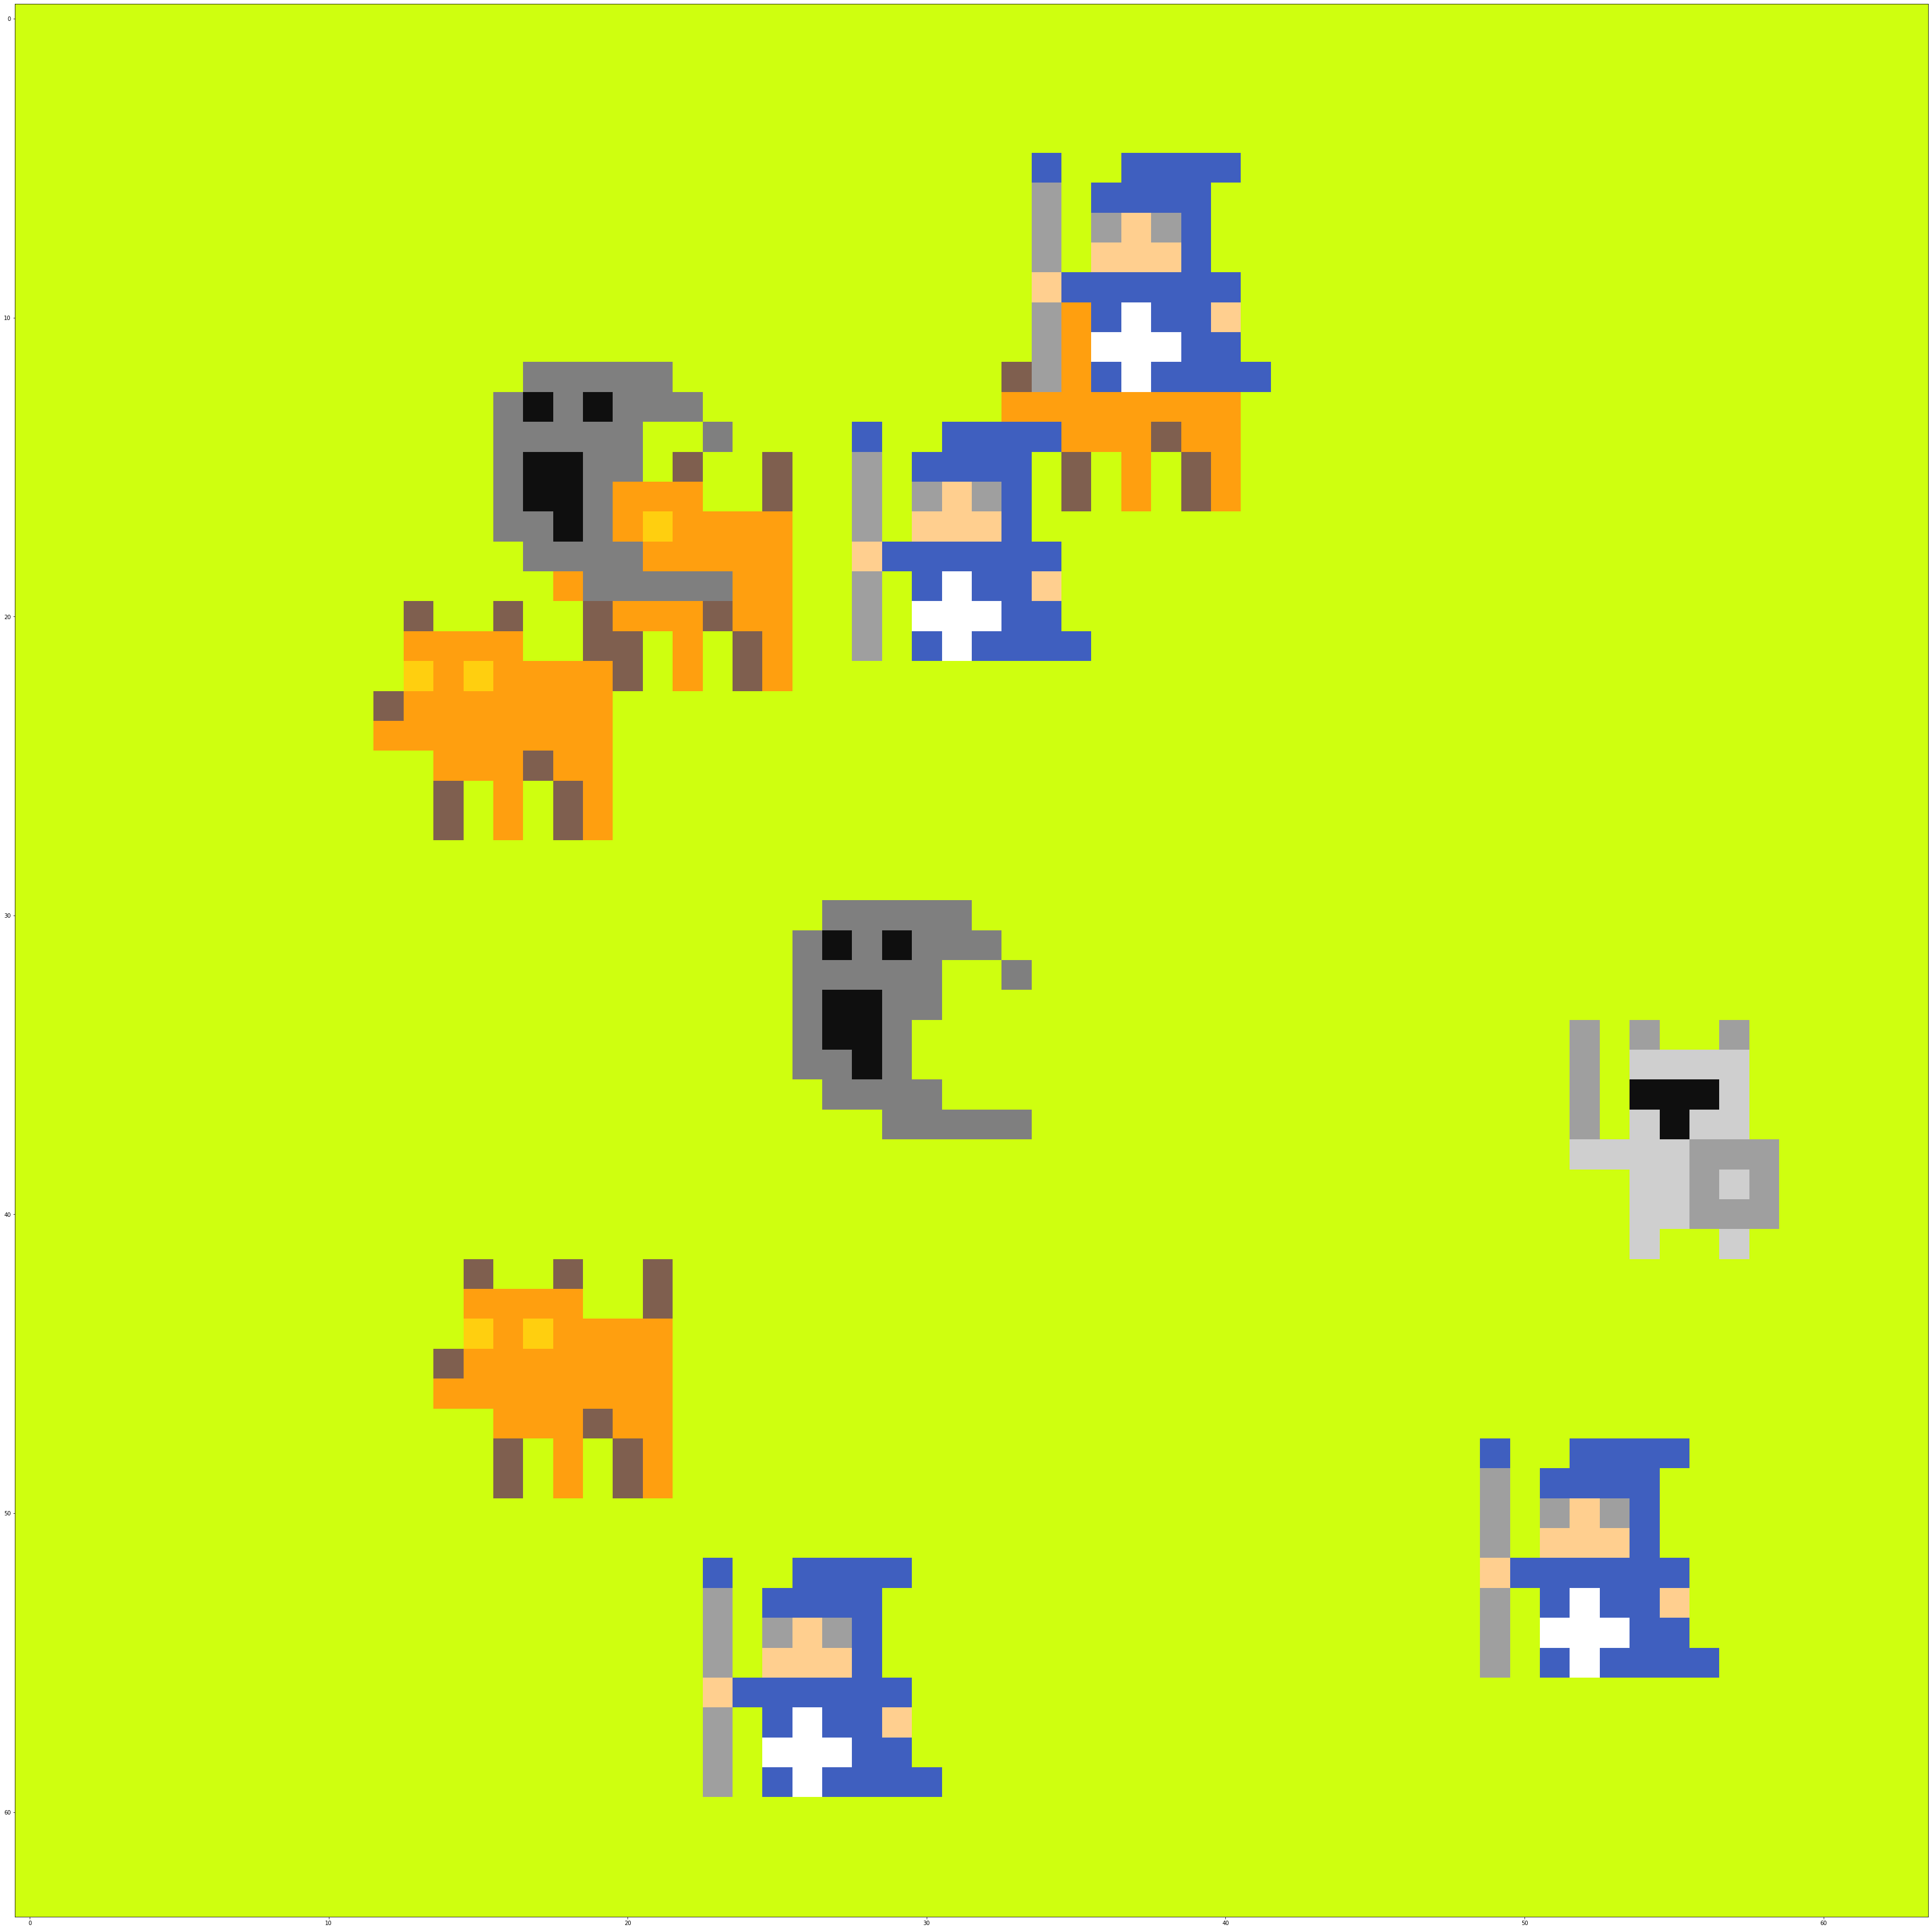

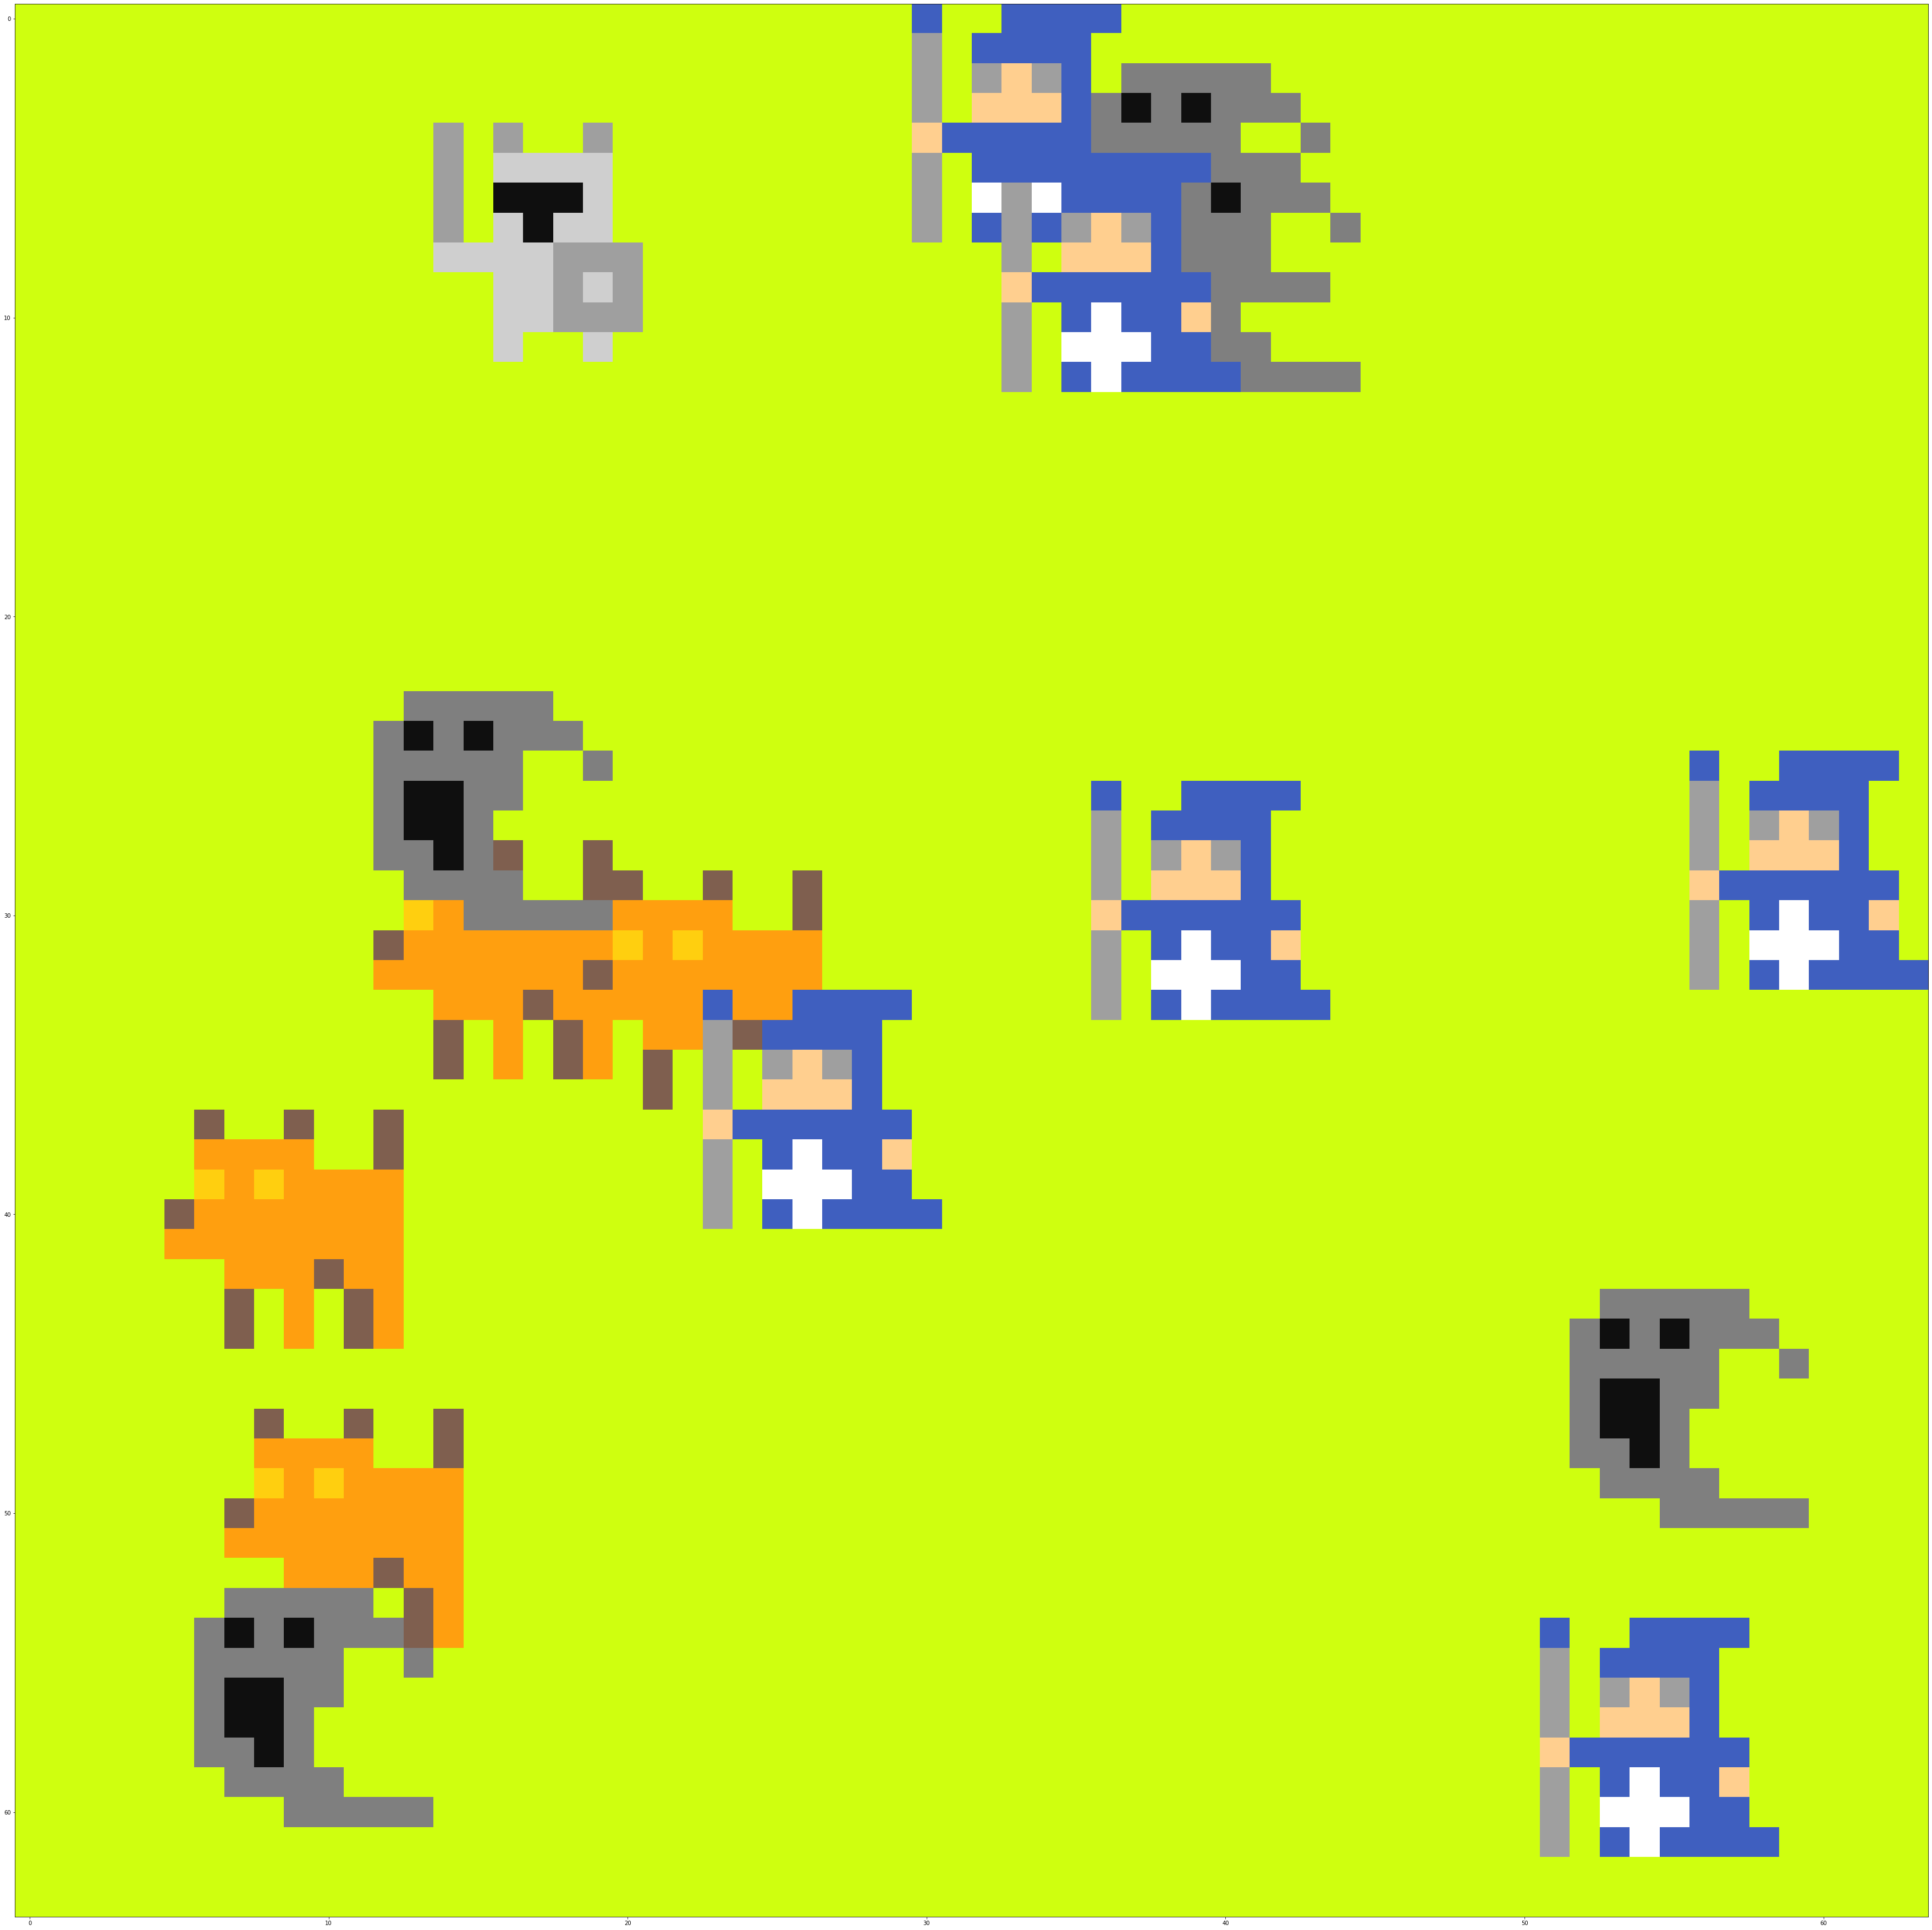

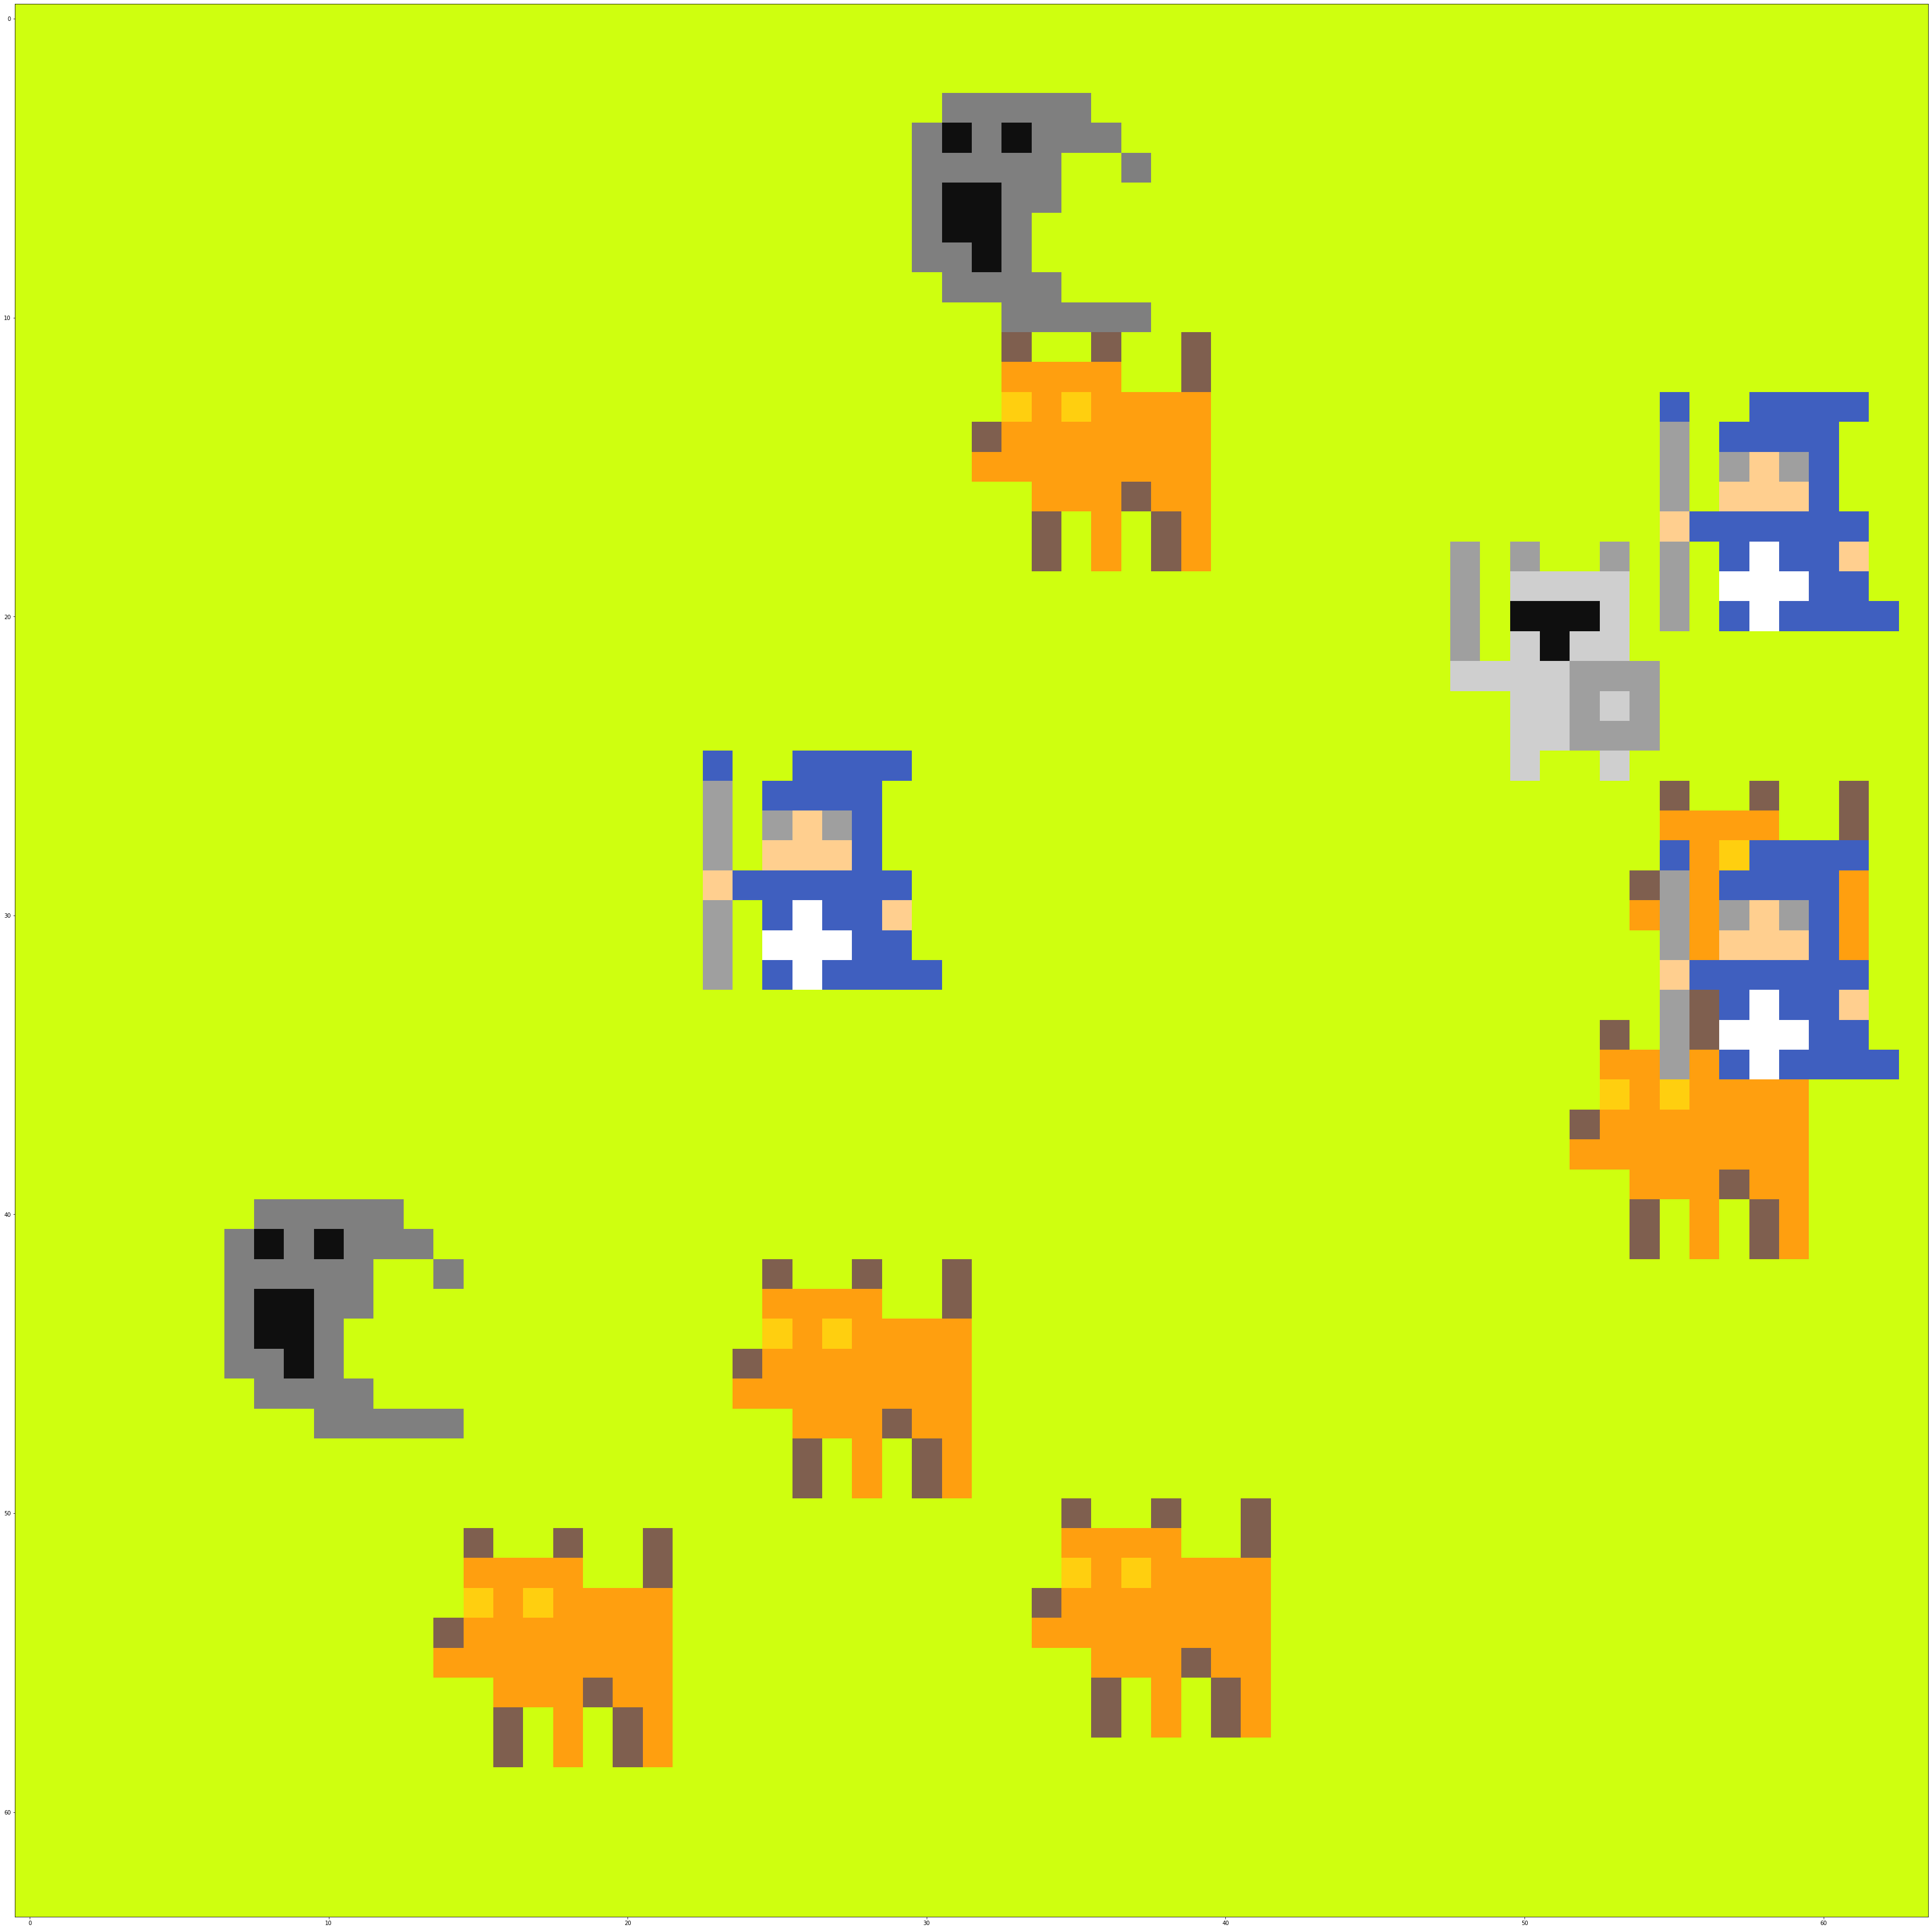

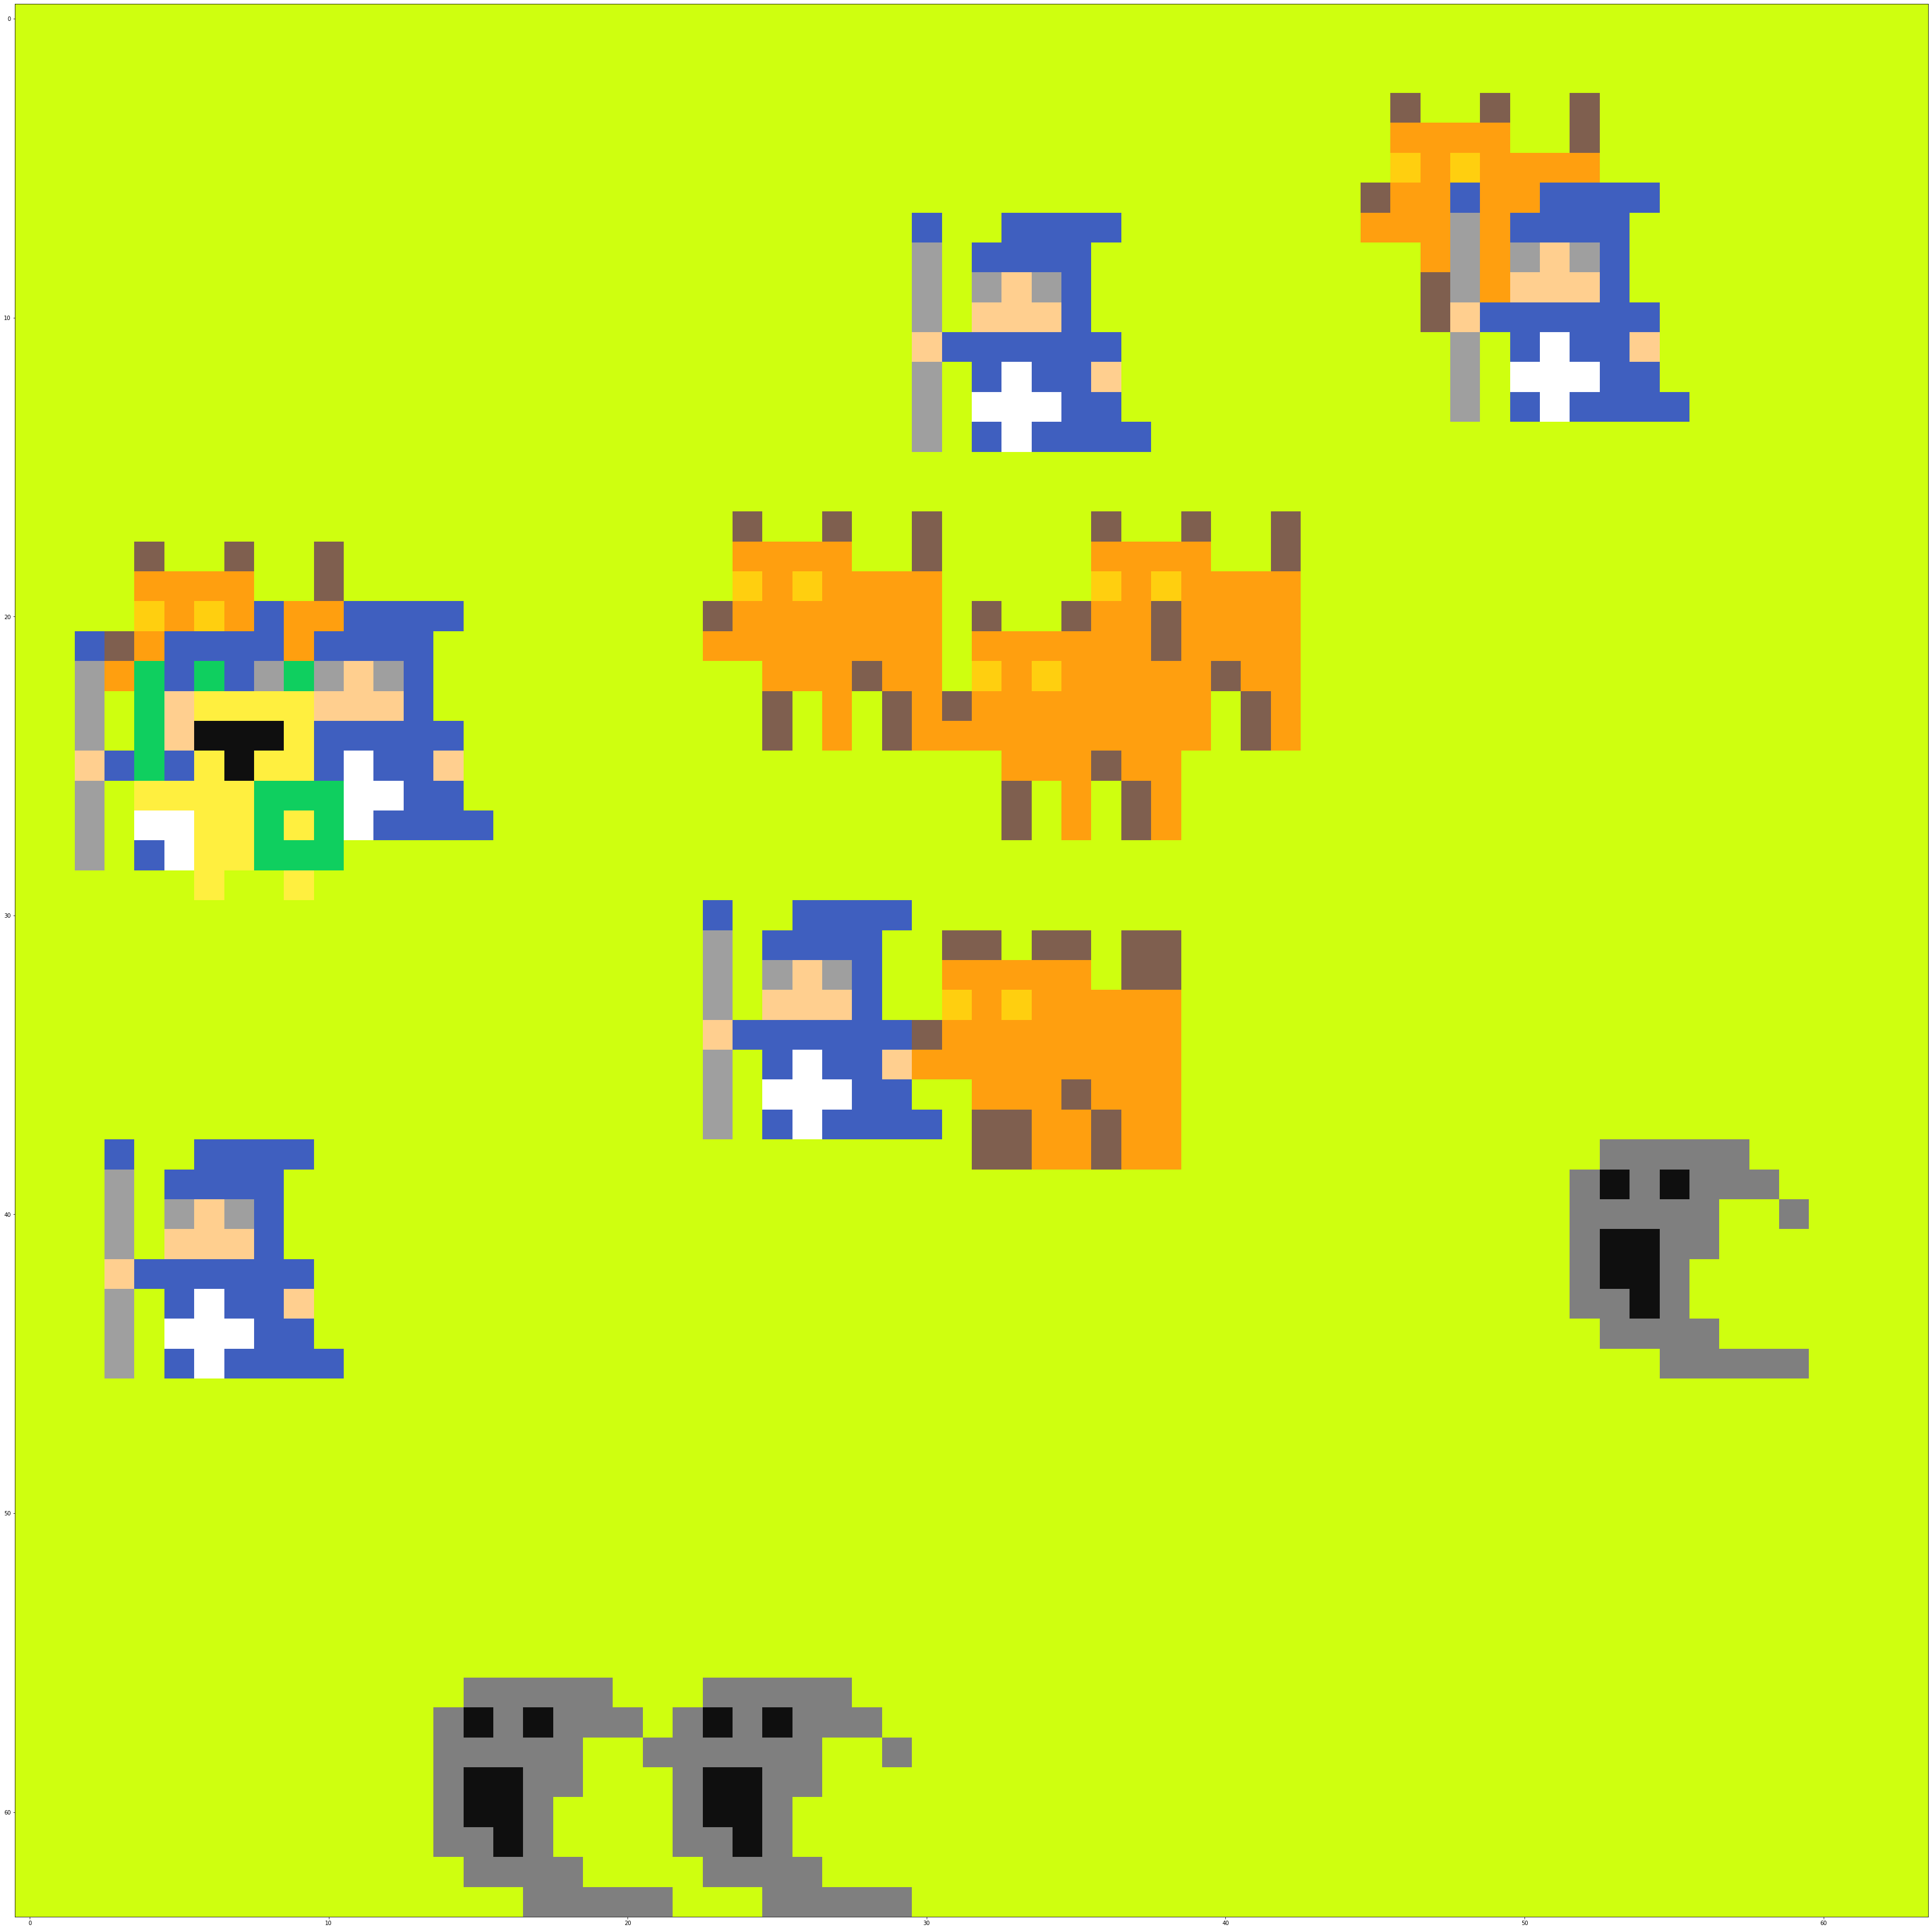

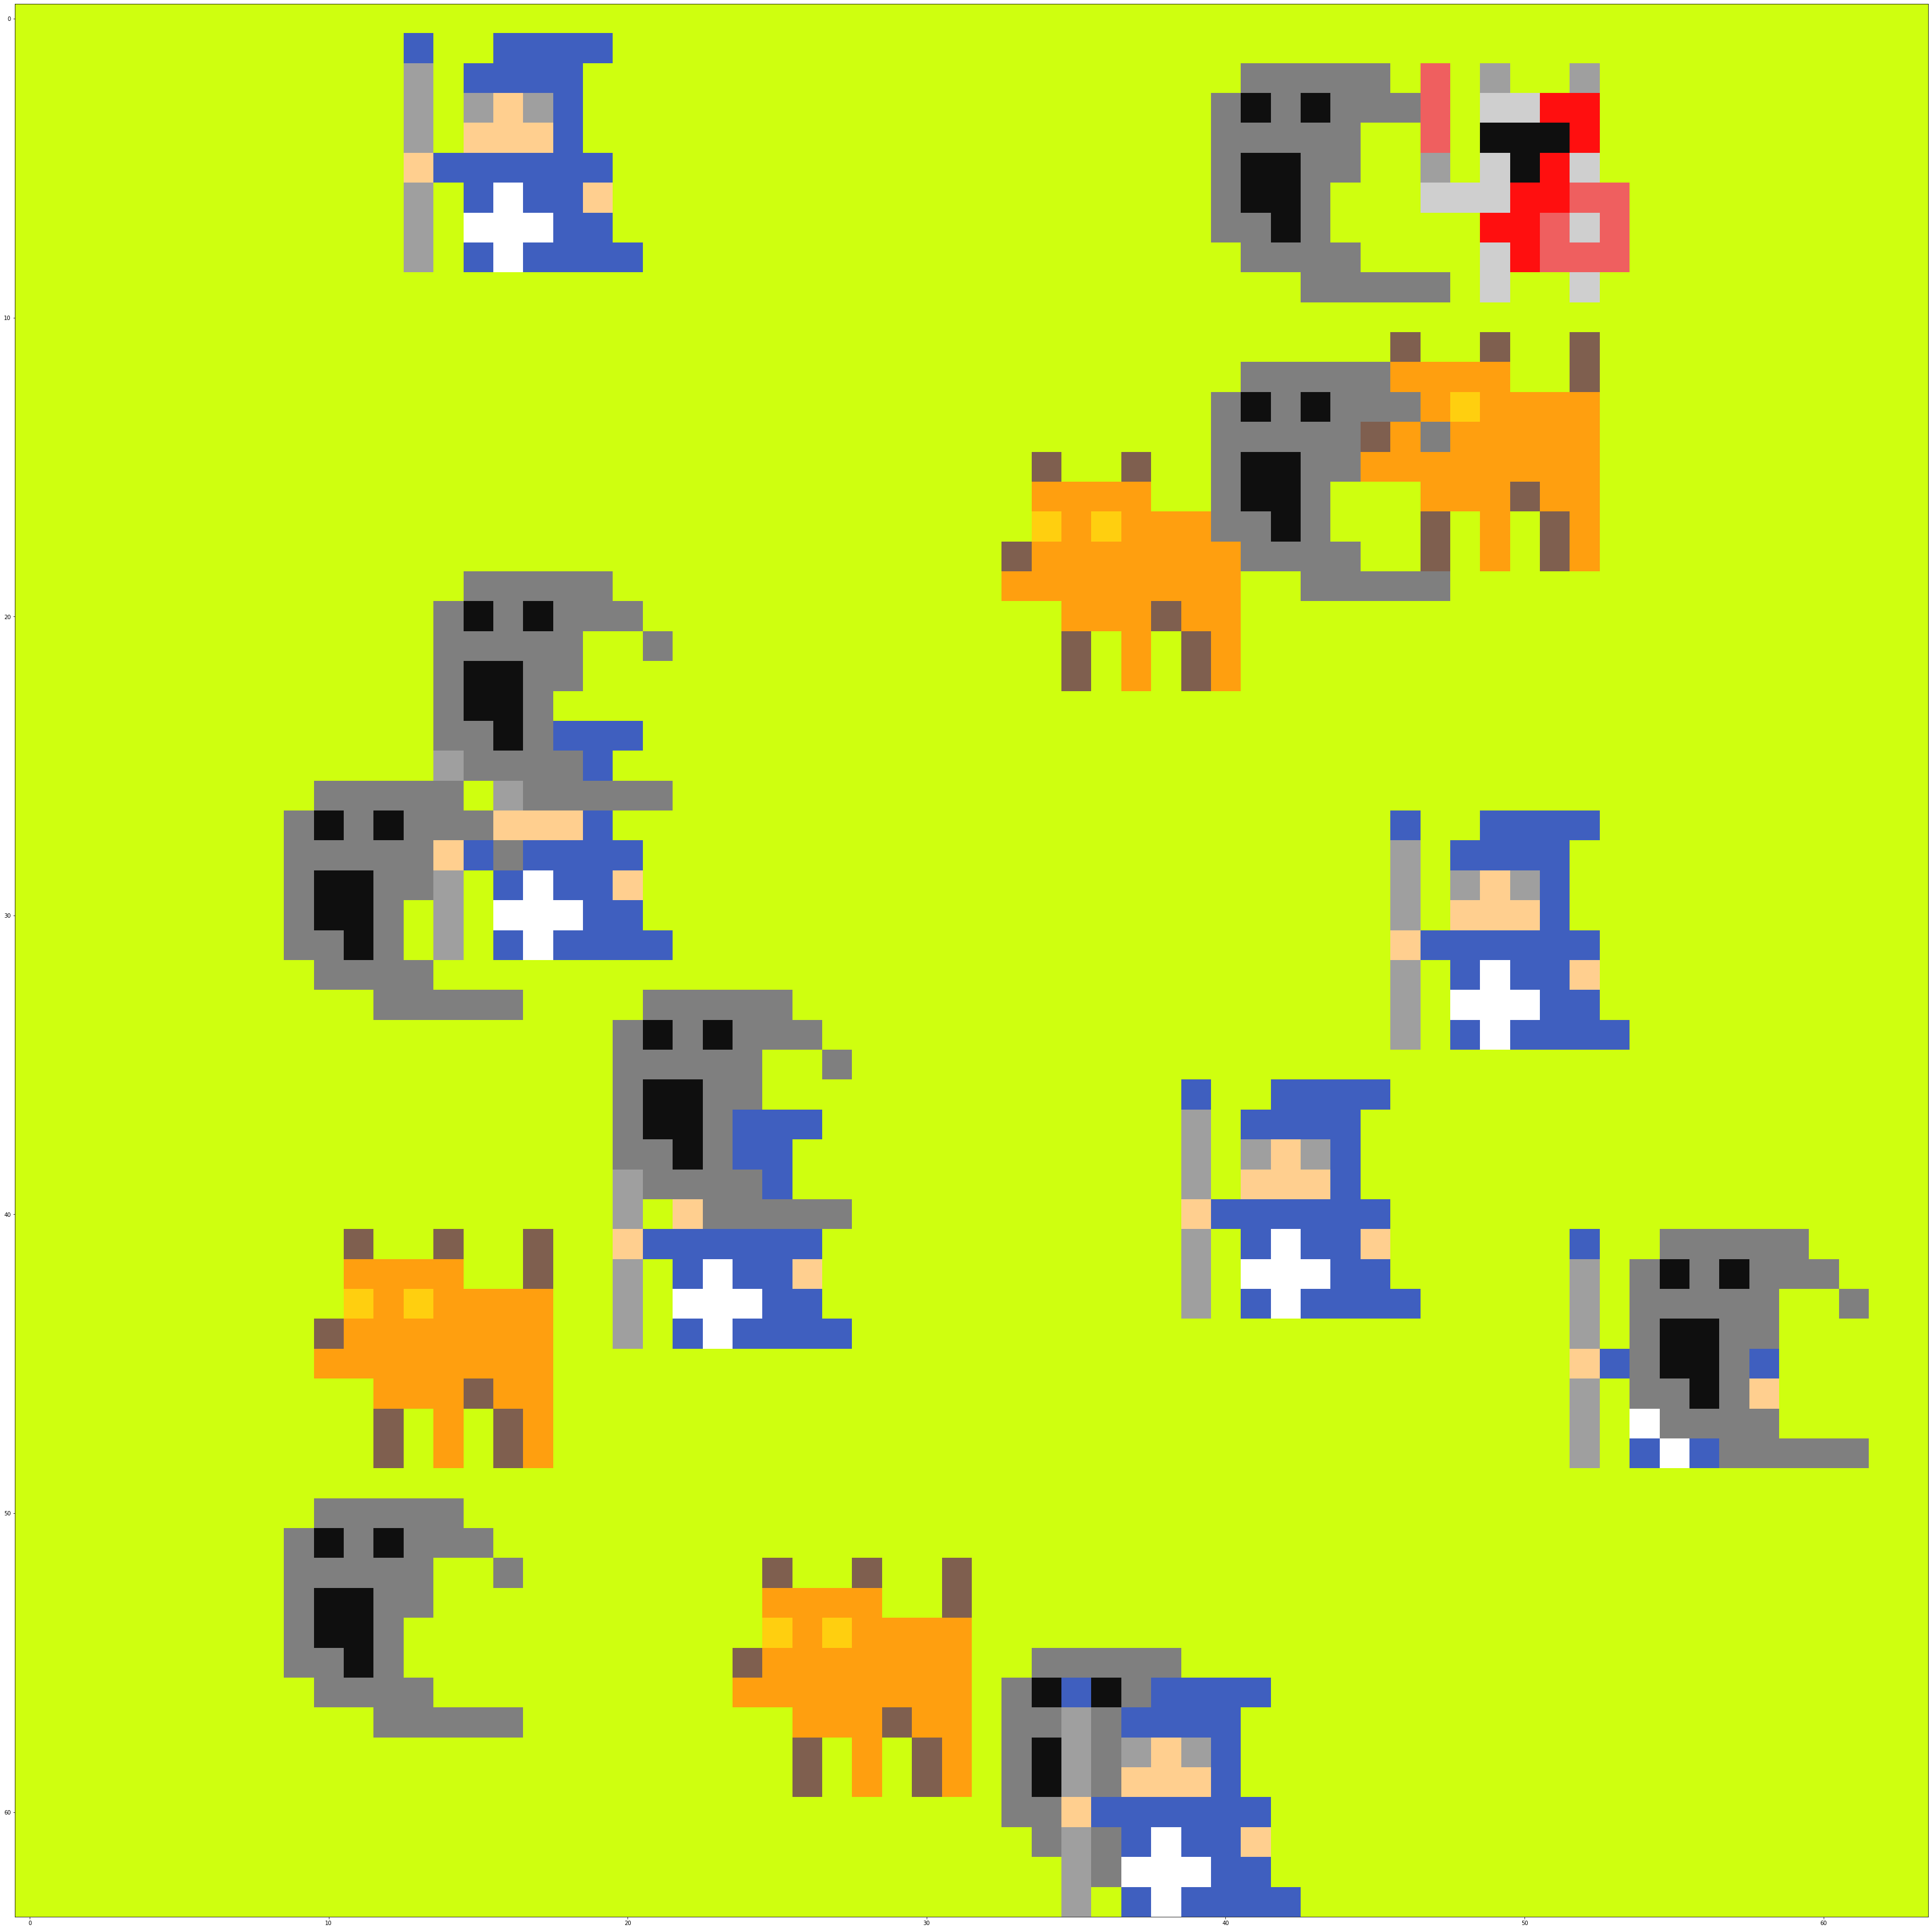

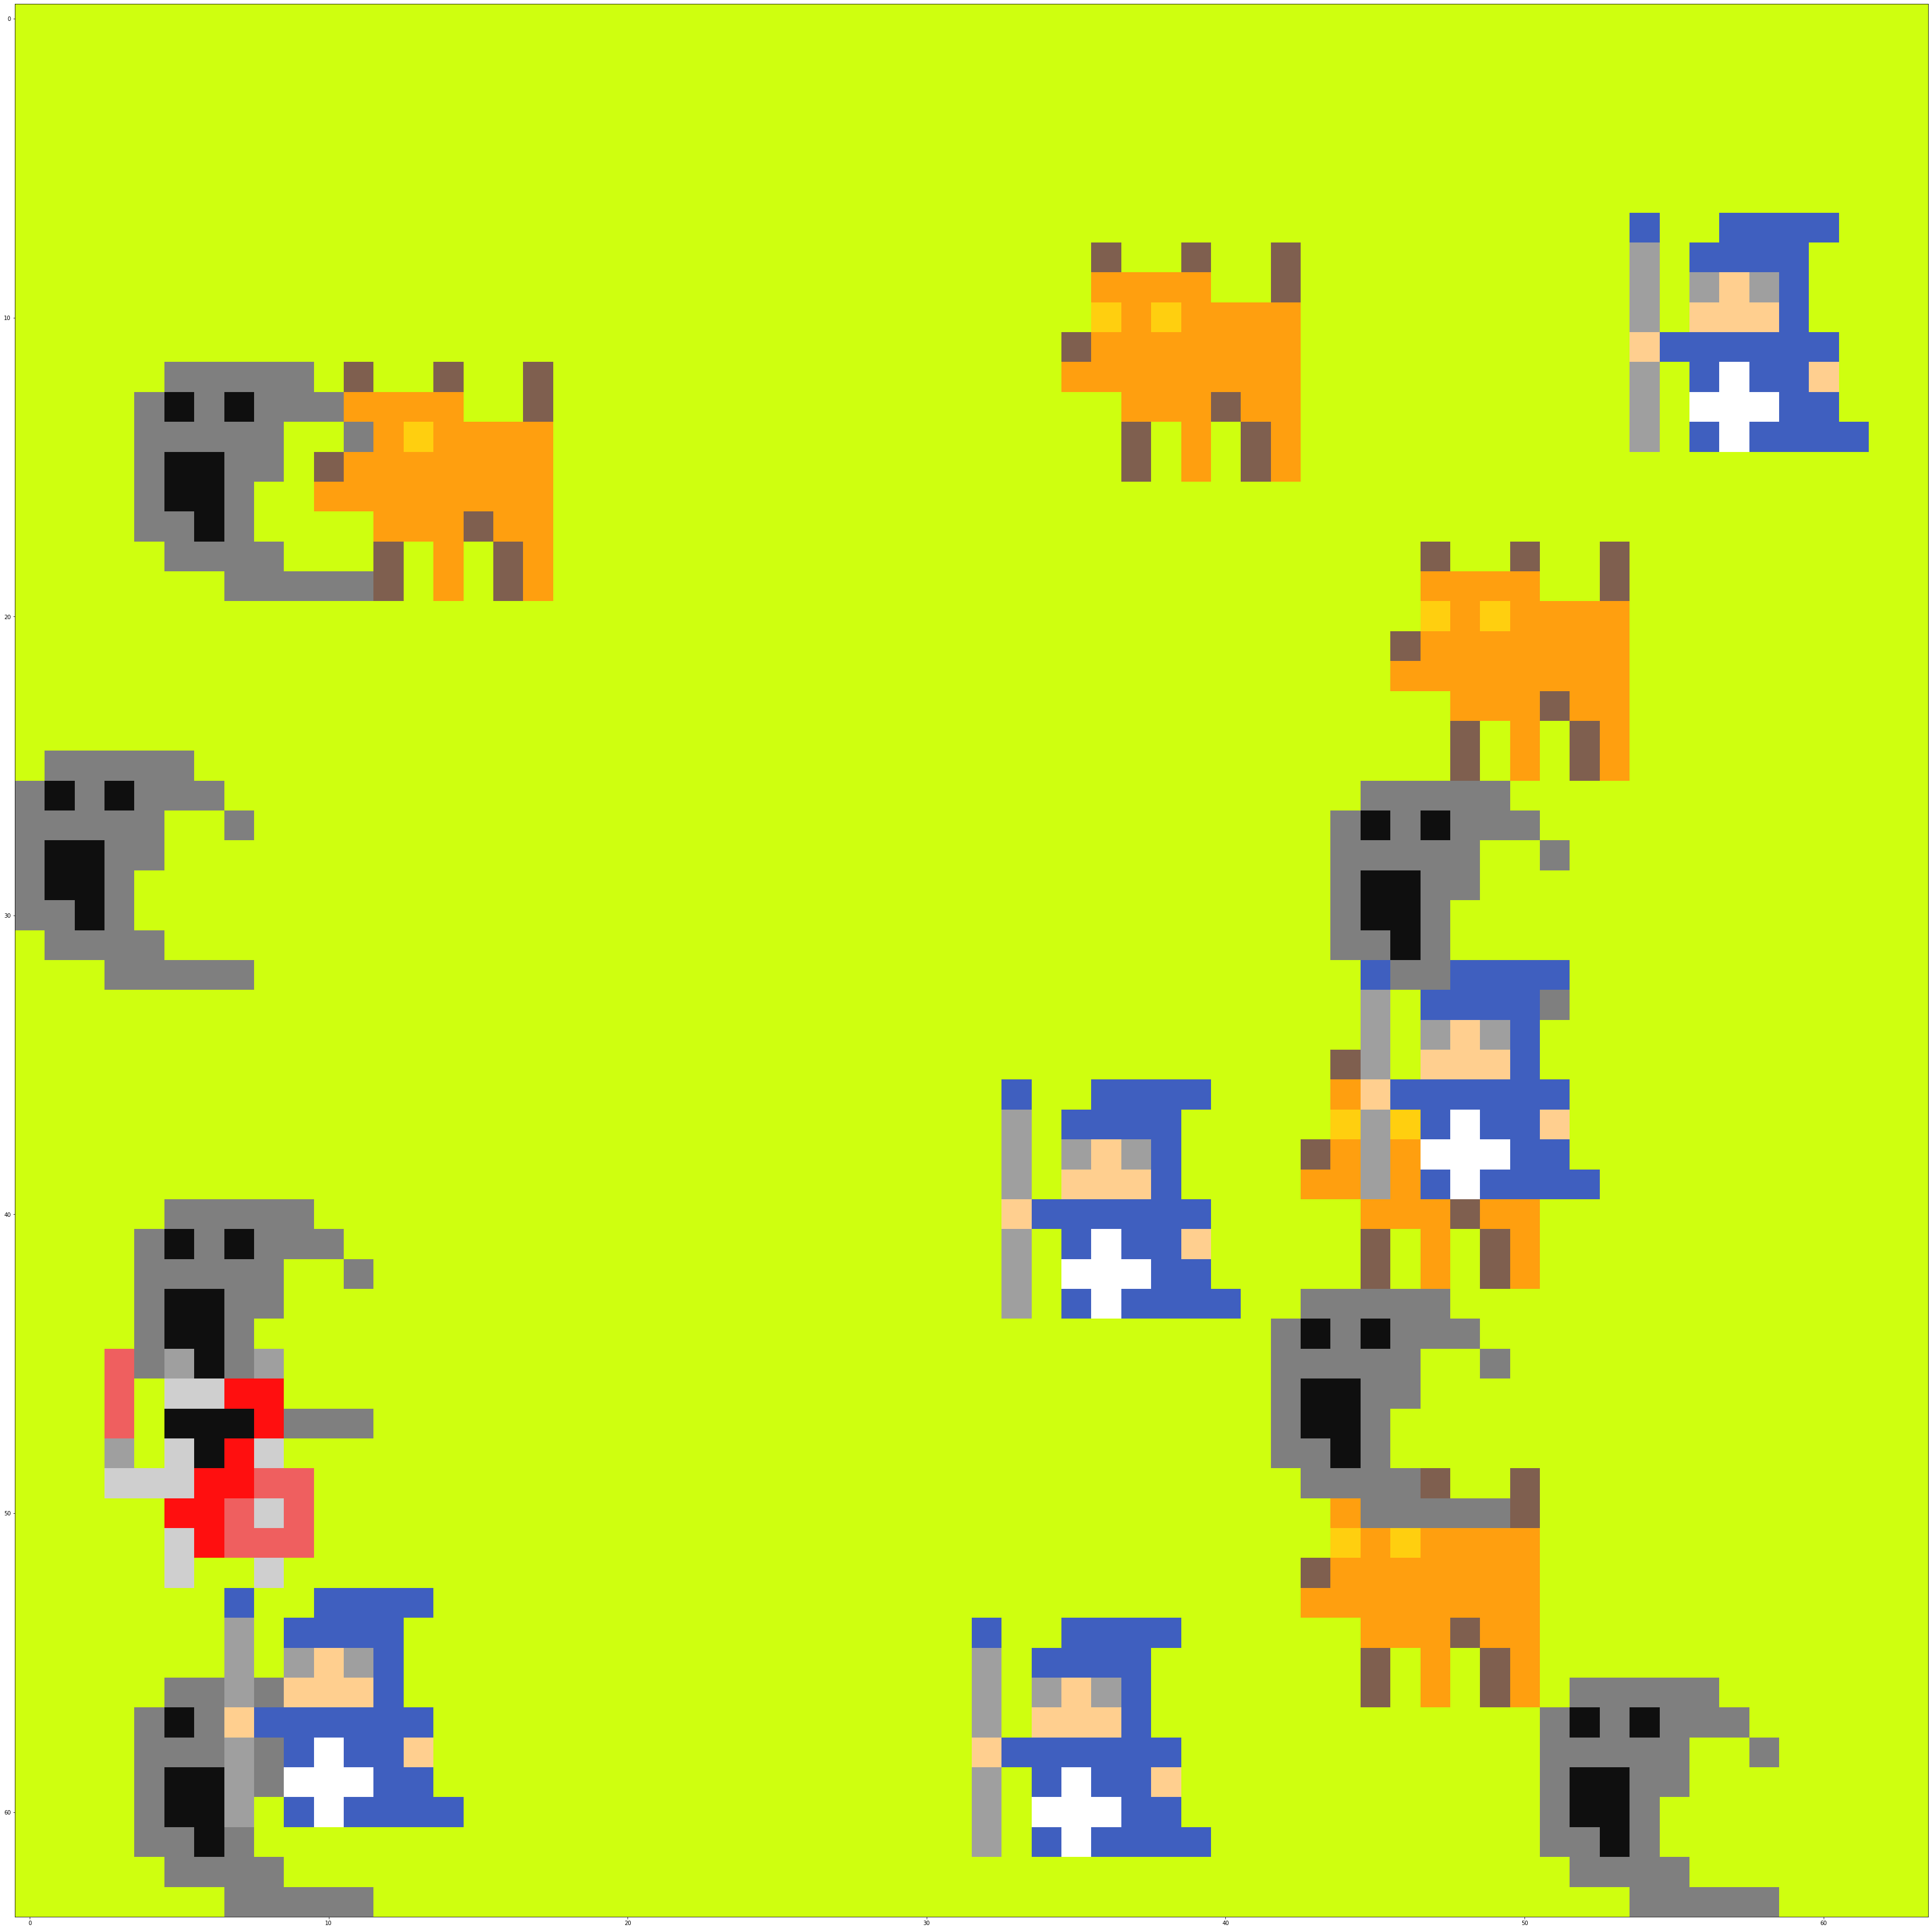

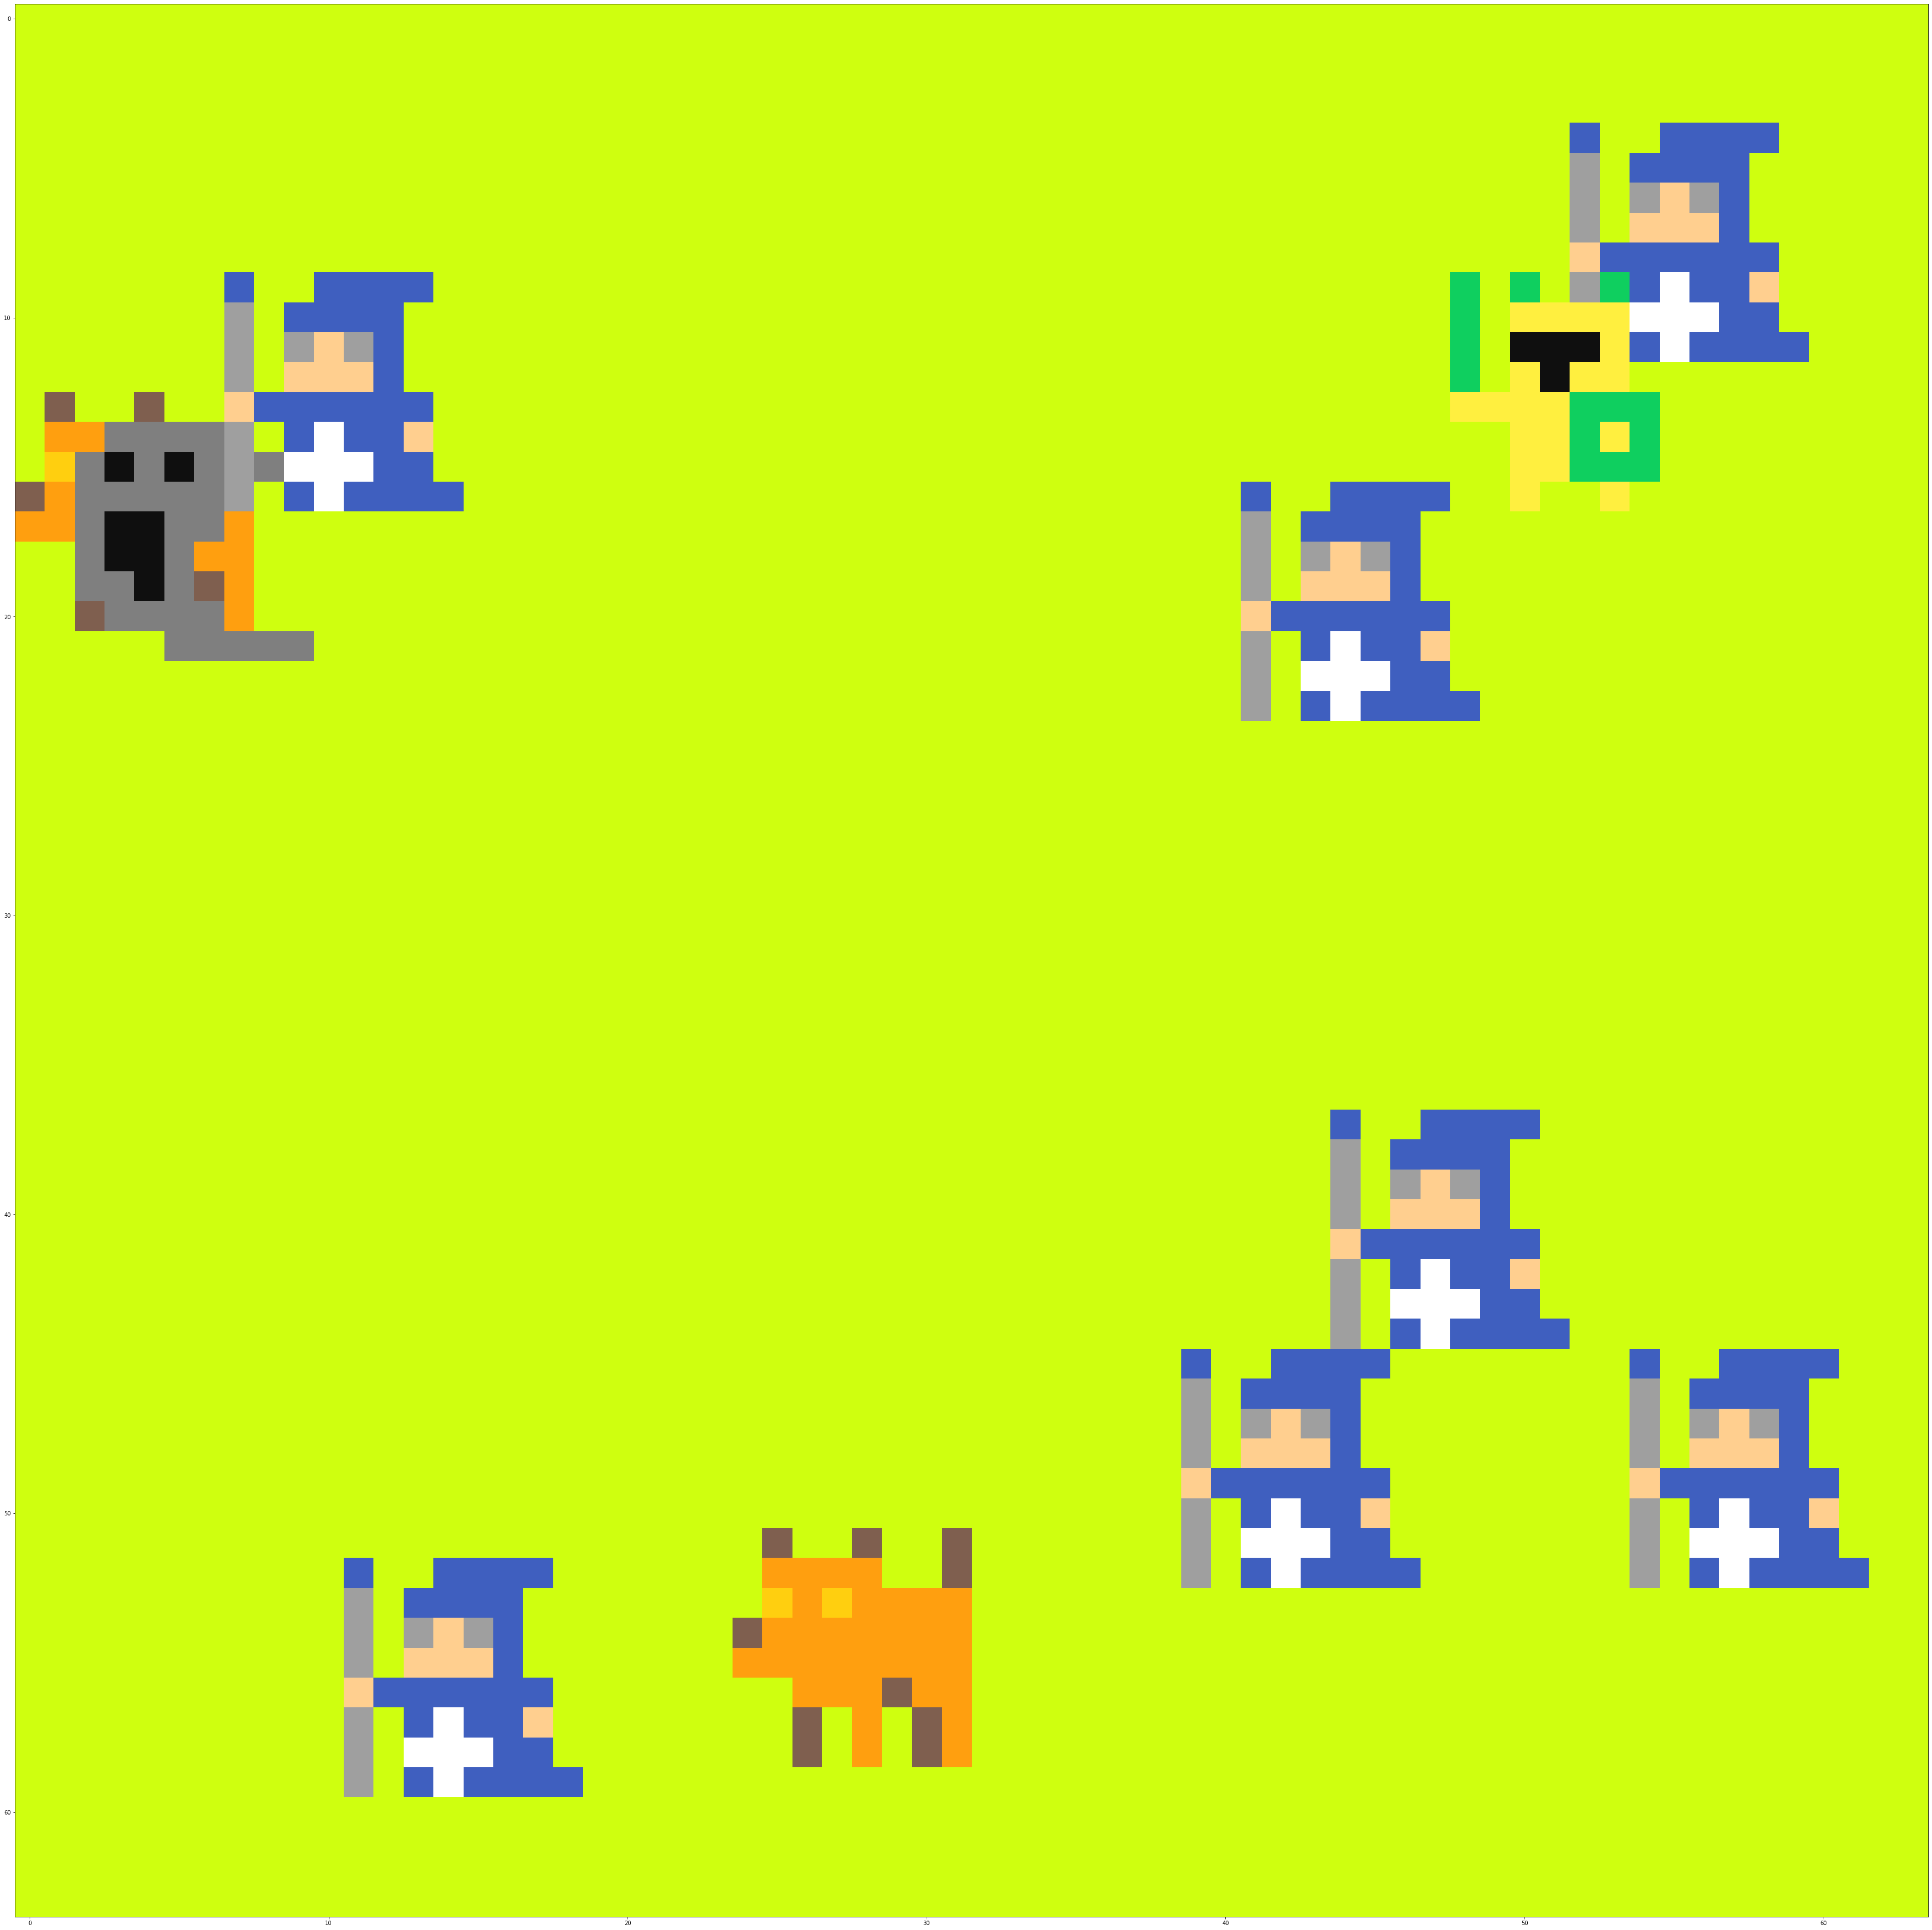

In [184]:
if __name__ == '__main__':
    for t in range(10):
        man_status = 'live'
        num_obj = rd.randint(10,19)
        queue = [obj_define(0, rd.randint(0,56), rd.randint(0,56))]
        for i in range(num_obj):
            queue.append(obj_define(rd.randint(1,3), rd.randint(0,56), rd.randint(0,56)))
        '''
        queue = []
        for i in fl[1:]:
            queue.append(obj_define(i[2], i[0], i[1]))
        ''' 
        man_status = determine_man_status(man_status, queue)
        bckgrnd = create_background()
        for obj in queue[1:]:
            if obj.obj_type==3:
                color_map = load_color.flower_color_map()
                bckgrnd = write_color(bckgrnd, color_map, obj)
                
        for obj in queue[1:]:
            if obj.obj_type==2:
                color_map = load_color.candy_color_map()
                bckgrnd = write_color(bckgrnd, color_map, obj)
            elif obj.obj_type==1:
                color_map = load_color.ghost_color_map()
                bckgrnd = write_color(bckgrnd, color_map, obj)       
        if man_status == 'live':
            color_map = load_color.man_live_color_map()
            bckgrnd = write_color(bckgrnd, color_map, queue[0])
        elif man_status == 'happy':
            color_map = load_color.man_happy_color_map()
            bckgrnd = write_color(bckgrnd, color_map, queue[0])
        elif man_status == 'die':
            color_map = load_color.man_die_color_map()
            bckgrnd = write_color(bckgrnd, color_map, queue[0])
        print_background(bckgrnd*16+15)
        save_golden("golden"+str(t)+".dat", bckgrnd)
        save_image("golden_image"+str(t)+".jpg", bckgrnd)
        save_input_pattern("input"+str(t)+".dat", queue)

In [11]:
for obj in queue[1:]:
    print(obj.obj_type, determine_man_overlap(queue[0], obj))
    
print(determine_man_status(man_status, queue))

1 False
1 False
2 False
2 True
2 False
1 True
1 False
1 False
1 False
1 False
1 False
2 False
1 True
1 False
2 False
1 False
1 False
1 False
1 True
happy


In [133]:
def extract_rom_data(file_name):
    with open(file_name,'r') as ROM:
        SR = np.array(ROM.readlines())
        SR_color = np.array([[int(obj[:4], 2), int(obj[4:8], 2), int(obj[8:12], 2)] for obj in SR])
        SR_mask = np.array([int(obj[12], 2) for obj in SR])
        SR_color =SR_color.reshape((6,8,24))
        SR_mask = SR_mask.reshape((6,8,8))
        for i in range(SR_mask.shape[0]):
            np.savetxt("mask"+str(i)+".txt", SR_mask[i], fmt='%d', delimiter=' ')
        for i in range(SR_color.shape[0]):
            np.savetxt("color"+str(i)+".txt", SR_color[i], fmt='%d', delimiter=' ')

In [138]:
extract_rom_data('SR_verilog.rcf')

In [200]:
def create_rom_data(file_name):
    with open(file_name,'w') as ROM:
        SR_color = np.zeros((6,8,24))
        SR_mask = np.zeros((6,8,8))
        for i in range(6):
            SR_color[i] = np.loadtxt("./color"+str(i)+".txt", dtype=int)
        for i in range(6):
            SR_mask[i] = np.loadtxt("./mask"+str(i)+".txt", dtype=int)
        SR_color = SR_color.reshape((6,8,8,3)).astype('int16')
        #SR_mask = SR_mask.reshape((384,1)).astype('int16')
        for k in range(6):
            for j in range(8):
                for i in range(8):
                    SR_0 = SR_color[k][j][i][0]
                    SR_1 = SR_color[k][j][i][1]
                    SR_2 = SR_color[k][j][i][2]
                    mem_str = '{0:04b}'.format(SR_0) + '{0:04b}'.format(SR_1) + '{0:04b}'.format(SR_2) + '{0:01b}'.format(int(SR_mask[k][j][i]))
                    ROM.write(mem_str+'\n')

In [201]:
create_rom_data('SR_verilog_different_style.rcf')